# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [2]:
# Import warnings
%pip install pyarrow
%pip install fastparquet

project_directory = '/Users/jagdshlk/Documents/Projects/Masters_AI_ML/ml-ai-playgrounds'

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring ins

In [3]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd

# for data viz.
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.3
matplotlib version: 3.9.4
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [6]:
# Try loading one file

one_file_df = pd.read_parquet(f'{project_directory}/EDA/Assignment/Datasets_and_Dictionary/trip_records/2023-1.parquet')
one_file_df.info()

one_file_df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00

In [7]:
one_file_df[(one_file_df['RatecodeID'].isna())]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2995023         1  2023-01-01 00:02:40   2023-01-01 00:30:36              NaN   
2995024         1  2023-01-01 00:57:48   2023-01-01 01:12:34              NaN   
2995025         2  2023-01-01 00:55:37   2023-01-01 01:00:41              NaN   
2995026         2  2023-01-01 00:43:47   2023-01-01 00:56:12              NaN   
2995027         2  2023-01-01 00:34:00   2023-01-01 00:51:00              NaN   
...           ...                  ...                   ...              ...   
3066761         2  2023-01-31 23:58:34   2023-02-01 00:12:33              NaN   
3066762         2  2023-01-31 23:31:09   2023-01-31 23:50:36              NaN   
3066763         2  2023-01-31 23:01:05   2023-01-31 23:25:36              NaN   
3066764         2  2023-01-31 23:40:00   2023-01-31 23:53:00              NaN   
3066765         2  2023-01-31 23:07:32   2023-01-31 23:21:56              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
2995023           0.00         NaN               None           142   
2995024           0.00         NaN               None           237   
2995025           0.86         NaN               None            24   
2995026           5.36         NaN               None            88   
2995027           6.03         NaN               None           232   
...                ...         ...                ...           ...   
3066761           3.05         NaN               None           107   
3066762           5.80         NaN               None           112   
3066763           4.67         NaN               None           114   
3066764           3.15         NaN               None           230   
3066765           2.85         NaN               None           262   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
2995023            79             0        20.13    0.0      0.5        0.00   
2995024           263             0        12.00    1.0      0.5        2.55   
2995025            41             0        12.80    0.0      0.5        2.14   
2995026           229             0        24.51    0.0      0.5        4.28   
2995027           263             0        32.30    0.0      0.5        7.26   
...               ...           ...          ...    ...      ...         ...   
3066761            48             0        15.80    0.0      0.5        3.96   
3066762            75             0        22.43    0.0      0.5        2.64   
3066763           239             0        17.61    0.0      0.5        5.32   
3066764            79             0        18.15    0.0      0.5        4.43   
3066765           143             0        15.97    0.0      0.5        2.00   

         tolls_amount  improvement_surcharge  total_amount  \
2995023           0.0                    1.0         24.13   
2995024           0.0                    1.0         21.55   
2995025           0.0                    1.0         16.44   
2995026           0.0                    1.0         32.79   
2995027           0.0                    1.0         43.56   
...               ...                    ...           ...   
3066761           0.0                    1.0         23.76   
3066762           0.0                    1.0         29.07   
3066763           0.0                    1.0         26.93   
3066764           0.0                    1.0         26.58   
3066765           0.0                    1.0         21.97   

         congestion_surcharge  airport_fee  
2995023                   NaN          NaN  
2995024                   NaN          NaN  
2995025                   NaN          NaN  
2995026                   NaN          NaN  
2995027                   NaN          NaN  
...                       ...          ...  
3066761                   NaN          NaN  
3066762                   NaN          NaN  
3066763                   NaN          NaN  
3066764                   N

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [8]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

# sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

# sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
testing_df = pd.read_parquet(f'{project_directory}/EDA/Assignment/Datasets_and_Dictionary/trip_records/2023-1.parquet')

def count_by_date_hour(month_df):
    month_df['date'] = month_df['tpep_pickup_datetime'].dt.date
    month_df['hour'] = month_df['tpep_pickup_datetime'].dt.hour

    sampled_month_data = pd.DataFrame({})
    grouped = month_df.groupby(['date', 'hour'])

    for _, group in grouped:
        group_sample = group.sample(frac = 0.05, random_state = 42)
        sampled_month_data = pd.concat([sampled_month_data, group_sample])

    return sampled_month_data


testing_df_sampled_data = count_by_date_hour(testing_df)
testing_df_sampled_data.groupby(['date', 'hour']).size().reset_index(name='count')

date  hour  count
0    2022-12-31    23      1
1    2023-01-01     0    265
2    2023-01-01     1    286
3    2023-01-01     2    253
4    2023-01-01     3    195
..          ...   ...    ...
740  2023-01-31    19    327
741  2023-01-31    20    306
742  2023-01-31    21    309
743  2023-01-31    22    255
744  2023-01-31    23    151

[745 rows x 3 columns]

In [9]:
testing_df_sampled_data.groupby(['date', 'hour']).size().reset_index(name='count')

date  hour  count
0    2022-12-31    23      1
1    2023-01-01     0    265
2    2023-01-01     1    286
3    2023-01-01     2    253
4    2023-01-01     3    195
..          ...   ...    ...
740  2023-01-31    19    327
741  2023-01-31    20    306
742  2023-01-31    21    309
743  2023-01-31    22    255
744  2023-01-31    23    151

[745 rows x 3 columns]

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [10]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

def sample_by_date_hour(month_df):
    month_df['date'] = month_df['tpep_pickup_datetime'].dt.date
    month_df['hour'] = month_df['tpep_pickup_datetime'].dt.hour

    sampled_month_data = pd.DataFrame({})
    grouped = month_df.groupby(['date', 'hour'])

    for _, group in grouped:
        group_sample = group.sample(frac = 0.05, random_state = 42)
        sampled_month_data = pd.concat([sampled_month_data, group_sample])

    return sampled_month_data

# Select the folder having data files
os.chdir(f'{project_directory}/EDA/Assignment/Datasets_and_Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = [f for f in os.listdir() if f.startswith('2023-') & f.endswith('.parquet')]

# initialise an empty dataframe
sampled_by_month_date_hour_df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        print(f"Processing {file_name}...")
        file_path = os.path.join(os.getcwd(), file_name)
        month_dataFrame = pd.read_parquet(file_path)
        sampled_month_df = sample_by_date_hour(month_dataFrame)
        sampled_by_month_date_hour_df = pd.concat([sampled_by_month_date_hour_df, sampled_month_df])
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

sampled_by_month_date_hour_df.info()

Processing 2023-12.parquet...
Processing 2023-6.parquet...
Processing 2023-7.parquet...
Processing 2023-5.parquet...
Processing 2023-11.parquet...
Processing 2023-10.parquet...
Processing 2023-4.parquet...
Processing 2023-1.parquet...
Processing 2023-8.parquet...
Processing 2023-9.parquet...
Processing 2023-2.parquet...
Processing 2023-3.parquet...
<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 3791 to 3202916
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount      

In [11]:
sampled_by_month_date_hour_df.groupby(['date', 'hour']).size().reset_index(name='count')

date  hour  count
0     2022-12-31    23      1
1     2023-01-01     0    265
2     2023-01-01     1    286
3     2023-01-01     2    253
4     2023-01-01     3    195
...          ...   ...    ...
8755  2023-12-31    19    258
8756  2023-12-31    20    265
8757  2023-12-31    21    260
8758  2023-12-31    22    232
8759  2023-12-31    23    184

[8760 rows x 3 columns]

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [67]:
# Store the df in csv/parquet
from datetime import datetime

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")  # iin this format '20250621_143215'
file_path = f'{project_directory}/EDA/Assignment/Datasets_and_Dictionary/trip_records/sampled_{timestamp}.parquet'
print(file_path)

sampled_by_month_date_hour_df.to_parquet(file_path)

/Users/jagdshlk/Documents/Projects/Masters_AI_ML/ml-ai-playgrounds/EDA/Assignment/Datasets_and_Dictionary/trip_records/sampled_20250621_161613.parquet


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [12]:
# Load the new data file
loaded_data_path = f'{project_directory}/EDA/Assignment/Datasets_and_Dictionary/trip_records/sampled_20250621_161613.parquet'
sampled_by_month_date_hour_df = pd.read_parquet(file_path)

In [13]:
sampled_by_month_date_hour_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3791            2  2023-11-30 23:58:12   2023-12-01 00:06:58              1.0   
1871            2  2023-11-30 23:58:35   2023-12-01 00:06:32              1.0   
1788            2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
3196699         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
1408            2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
3791              1.31         1.0                  N           163   
1871              1.22         1.0                  N           161   
1788              3.99         1.0                  N           148   
3196699           4.79         NaN               None           231   
1408              1.05         1.0                  N           161   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
3791              162             1  ...      0.5        3.00           0.0   
1871              229             1  ...      0.5        1.43           0.0   
1788               50             1  ...      0.5        5.66           0.0   
3196699            61             0  ...      0.5        3.00           0.0   
1408              161             1  ...      0.5        3.14           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
3791                       1.0         18.00                   2.5   
1871                       1.0         15.73                   2.5   
1788                       1.0         33.96                   2.5   
3196699                    1.0         29.43                   NaN   
1408                       1.0         18.84                   2.5   

         Airport_fee        date  hour airport_fee  
3791             0.0  2023-11-30    23         NaN  
1871             0.0  2023-11-30    23         NaN  
1788             0.0  2023-12-01     0         NaN  
3196699          NaN  2023-12-01     0         NaN  
1408             0.0  2023-12-01     0         NaN  

[5 rows x 22 columns]

In [14]:
sampled_by_month_date_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 3791 to 3202916
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            f

In [15]:
sampled_by_month_date_hour_df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3791            2  2023-11-30 23:58:12   2023-12-01 00:06:58              1.0   
1871            2  2023-11-30 23:58:35   2023-12-01 00:06:32              1.0   
1788            2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
3196699         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
1408            2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
...           ...                  ...                   ...              ...   
3203004         2  2023-06-30 23:53:10   2023-07-01 00:05:55              1.0   
3203122         1  2023-06-30 23:22:42   2023-06-30 23:39:06              1.0   
3206515         1  2023-06-30 23:50:42   2023-07-01 00:20:00              2.0   
3206491         1  2023-06-30 23:05:31   2023-06-30 23:15:52              1.0   
3202916         2  2023-07-01 00:00:51   2023-07-01 00:24:19              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
3791              1.31         1.0                  N           163   
1871              1.22         1.0                  N           161   
1788              3.99         1.0                  N           148   
3196699           4.79         NaN               None           231   
1408              1.05         1.0                  N           161   
...                ...         ...                ...           ...   
3203004           2.63         1.0                  N           170   
3203122           0.00        99.0                  N            90   
3206515           5.40         1.0                  N            87   
3206491           1.00         1.0                  N            87   
3202916           5.04         1.0                  N           209   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
3791              162             1  ...      0.5        3.00           0.0   
1871              229             1  ...      0.5        1.43           0.0   
1788               50             1  ...      0.5        5.66           0.0   
3196699            61             0  ...      0.5        3.00           0.0   
1408              161             1  ...      0.5        3.14           0.0   
...               ...           ...  ...      ...         ...           ...   
3203004           143             1  ...      0.5        4.80           0.0   
3203122           232             1  ...      0.5        0.00           0.0   
3206515           161             1  ...      0.5        2.00           0.0   
3206491           231             2  ...      0.5        0.00           0.0   
3202916           225             1  ...      0.5        4.56           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
3791                       1.0         18.00                   2.5   
1871                       1.0         15.73                   2.5   
1788                       1.0         33.96                   2.5   
3196699                    1.0         29.43                   NaN   
1408                       1.0         18.84                   2.5   
...                        ...           ...                   ...   
3203004                    1.0         24.00                   2.5   
3203122                    1.0         19.70                   0.0   
3206515                    1.0         39.40                   2.5   
3206491                    1.0         15.70                   2.5   
3202916                    1.0         34.96                   2.5   

         Airport_fee        date  hour airport_fee  
3791             0.0  2023-11-30    23         NaN  
1871             0.0  2023-11-30    23         NaN  
1788             0.0  2023-12-01     0         NaN  
3196699          NaN  2023-12-01     0         NaN  
1408             0.0  2023-12-01     0         NaN  
...              ...         ...   ...         ...  
3203004          0.0  

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [16]:
# Fix the index and drop any columns that are not needed
sampled_by_month_date_hour_df = sampled_by_month_date_hour_df.sort_values(by=['date', 'hour'], ascending=[True, True]).reset_index(drop=True)
sampled_by_month_date_hour_df = sampled_by_month_date_hour_df.drop('store_and_fwd_flag', axis=1)
sampled_by_month_date_hour_df


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   
1               2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
2               2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
3               2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
4               2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
...           ...                  ...                   ...              ...   
1896395         2  2023-12-31 23:44:09   2023-12-31 23:50:04              1.0   
1896396         2  2023-12-31 23:44:04   2024-01-01 00:03:36              1.0   
1896397         2  2023-12-31 23:37:20   2023-12-31 23:41:18              1.0   
1896398         1  2023-12-31 23:12:30   2023-12-31 23:21:12              NaN   
1896399         2  2023-12-31 23:35:11   2024-01-01 00:15:03              5.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0                 0.86         1.0           141           140             1   
1                 7.74         1.0           138           256             2   
2                 1.24         1.0           161           237             1   
3                 1.44         1.0           237           141             2   
4                 0.54         1.0           143           142             2   
...                ...         ...           ...           ...           ...   
1896395           0.81         1.0           263           262             1   
1896396           5.78         1.0           161           261             1   
1896397           1.06         1.0            79           137             1   
1896398           0.00         NaN           166           244             0   
1896399           8.45         1.0           142           261             2   

         fare_amount  ...  mta_tax  tip_amount  tolls_amount  \
0               6.50  ...      0.5        2.00           0.0   
1              32.40  ...      0.5        0.00           0.0   
2               7.90  ...      0.5        2.58           0.0   
3              11.40  ...      0.5        0.00           0.0   
4               6.50  ...      0.5        0.00           0.0   
...              ...  ...      ...         ...           ...   
1896395         7.20  ...      0.5        2.44           0.0   
1896396        27.50  ...      0.5        4.00           0.0   
1896397         7.20  ...      0.5        2.44           0.0   
1896398        14.64  ...      0.5        0.00           0.0   
1896399        40.80  ...      0.5        0.00           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
0                          1.0         13.50                   2.5   
1                          1.0         41.15                   0.0   
2                          1.0         15.48                   2.5   
3                          1.0         16.40                   2.5   
4                          1.0         11.50                   2.5   
...                        ...           ...                   ...   
1896395                    1.0         14.64                   2.5   
1896396                    1.0         36.50                   2.5   
1896397                    1.0         14.64                   2.5   
1896398                    1.0         16.14                   NaN   
1896399                    1.0         45.80                   2.5   

         Airport_fee        date hour  airport_fee  
0                NaN  2022-12-31   23         0.00  
1                NaN  2023-01-01    0         1.25  
2                NaN  2023-01-01    0         0.00  
3                NaN  2023-01-01    0         0.00  
4                NaN  2023-01-01    0         0.00  
...              ...         ...  ...          ...  
1896395          0.0  2023-12-31   23          NaN  
1896396          0.0  2023-12-31   23    

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [17]:
# Combine the two airport fee columns
airport_fee_combine = sampled_by_month_date_hour_df.copy()

print(airport_fee_combine['Airport_fee'].unique())
print(airport_fee_combine['airport_fee'].unique())

airport_fee_combine['airport_fee'] = airport_fee_combine.apply(
    lambda row: row['airport_fee'] if pd.notnull(row['airport_fee']) else row['Airport_fee'],
    axis=1
)

sampled_by_month_date_hour_df['airport_fee'] = airport_fee_combine['airport_fee']
sampled_by_month_date_hour_df = sampled_by_month_date_hour_df.drop('Airport_fee', axis=1)
sampled_by_month_date_hour_df.info()


[  nan  0.    1.25 -1.25  1.75 -1.75  1.  ]
[ 0.    1.25   nan -1.25]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [18]:
# check where values of fare amount are negative
negative_fare_amount = sampled_by_month_date_hour_df.copy()

print(negative_fare_amount[negative_fare_amount['fare_amount'] < 0])

del negative_fare_amount


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, airport_fee]
Index: []


Did you notice something different in the `RatecodeID` column for above records?

In [19]:
# Analyse RatecodeID for the negative fare amounts
print(sampled_by_month_date_hour_df['RatecodeID'].unique())
missingRatecodeID = sampled_by_month_date_hour_df[(sampled_by_month_date_hour_df['RatecodeID'].isna())]
missingRatecodeID.groupby(['date']).size().reset_index(name='count')


[ 1. nan  2.  4.  5. 99.  3.  6.]


date  count
0    2023-01-01    177
1    2023-01-02     66
2    2023-01-03     99
3    2023-01-04    103
4    2023-01-05    106
..          ...    ...
360  2023-12-27    103
361  2023-12-28     97
362  2023-12-29    107
363  2023-12-30    100
364  2023-12-31    312

[365 rows x 2 columns]

In [20]:
# all the negative values

monetary_cols = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

# Create a mask where any of the selected columns are negative
neg_mask = (sampled_by_month_date_hour_df[monetary_cols] < 0).any(axis=1)
# Filter the DataFrame using the mask
rows_with_negatives = sampled_by_month_date_hour_df[neg_mask]
rows_with_negatives



VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3966            2  2023-01-02 05:12:19   2023-01-02 05:41:45              1.0   
9093            2  2023-01-03 14:24:45   2023-01-03 14:25:14              1.0   
77200           2  2023-01-17 12:37:35   2023-01-17 13:24:00              1.0   
77920           2  2023-01-17 15:03:44   2023-01-17 15:36:28              1.0   
86509           2  2023-01-19 09:50:26   2023-01-19 09:58:13              1.0   
...           ...                  ...                   ...              ...   
1779262         2  2023-12-09 08:34:26   2023-12-09 08:34:35              1.0   
1796087         2  2023-12-12 06:57:09   2023-12-12 07:16:37              1.0   
1831037         2  2023-12-17 08:10:57   2023-12-17 08:28:46              1.0   
1842933         2  2023-12-19 15:33:14   2023-12-19 16:05:27              2.0   
1886861         2  2023-12-29 17:32:20   2023-12-29 17:33:49              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
3966             17.07         3.0           142             1             2   
9093              0.00         2.0           132           132             2   
77200            17.68         2.0           230           132             2   
77920             4.12         1.0           239           168             2   
86509             0.50         1.0           161            43             2   
...                ...         ...           ...           ...           ...   
1779262           0.00         2.0           107           137             2   
1796087           3.30         1.0           164           239             2   
1831037          11.27         1.0           132            70             2   
1842933           5.83         1.0           186            87             2   
1886861           0.02         1.0           161           161             2   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
3966             0.0    0.0      0.0         0.0           0.0   
9093             0.0    0.0     -0.5         0.0           0.0   
77200            0.0    0.0     -0.5         0.0           0.0   
77920            0.0    0.0     -0.5         0.0           0.0   
86509            0.0    0.0     -0.5         0.0           0.0   
...              ...    ...      ...         ...           ...   
1779262          0.0    0.0     -0.5         0.0           0.0   
1796087          0.0    0.0     -0.5         0.0           0.0   
1831037          0.0    0.0     -0.5         0.0           0.0   
1842933          0.0    0.0     -0.5         0.0           0.0   
1886861          0.0    0.0     -0.5         0.0           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
3966                      -1.0         -1.00                   0.0   
9093                      -1.0         -5.25                  -2.5   
77200                     -1.0         -4.00                  -2.5   
77920                     -1.0         -4.00                  -2.5   
86509                     -1.0         -4.00                  -2.5   
...                        ...           ...                   ...   
1779262                   -1.0         -4.00                  -2.5   
1796087                   -1.0         -4.00                  -2.5   
1831037                   -1.0         -3.25                   0.0   
1842933                   -1.0         -4.00                  -2.5   
1886861                   -1.0         -4.00                  -2.5   

               date  hour  airport_fee  
3966     2023-01-02     5         0.00  
9093     2023-01-03    14        -1.25  
77200    2023-01-17    12         0.00  
77920    2023-01-17    15         0.00  
86509    2023-01-19     9         0.00  
...             ...   ...          ...  
1779262  2023-12-09     8         0.00  
1796087  2023-12-12     6         0.00  
1831037  2023-12-17     8        -1.75  
1842933  2023-12-19    15      

In [21]:
# Find which columns have negative values
negative_value = sampled_by_month_date_hour_df.copy()

neg_cols = [col for col in monetary_cols if (negative_value[col] < 0).any()]
print("Columns with negative values:", neg_cols)


Columns with negative values: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [22]:
# fix these negative values
fix_negative_value = sampled_by_month_date_hour_df.copy()

for col in monetary_cols:
    fix_negative_value[col] = fix_negative_value[col].mask(
        fix_negative_value[col] < 0, 0
    )

sampled_by_month_date_hour_df[monetary_cols] = fix_negative_value[monetary_cols]
sampled_by_month_date_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  date                   object        
 18  hour                  

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [23]:
# Find the proportion of missing values in each column
missing_proportion = sampled_by_month_date_hour_df.isna().mean()
print(missing_proportion.sort_values(ascending=False))


passenger_count          0.034209
congestion_surcharge     0.034209
airport_fee              0.034209
RatecodeID               0.034209
tpep_dropoff_datetime    0.000000
tpep_pickup_datetime     0.000000
VendorID                 0.000000
trip_distance            0.000000
payment_type             0.000000
fare_amount              0.000000
PULocationID             0.000000
DOLocationID             0.000000
mta_tax                  0.000000
extra                    0.000000
tip_amount               0.000000
tolls_amount             0.000000
total_amount             0.000000
improvement_surcharge    0.000000
date                     0.000000
hour                     0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

[ 1.  2.  3. nan  4.  6.  5.]
0


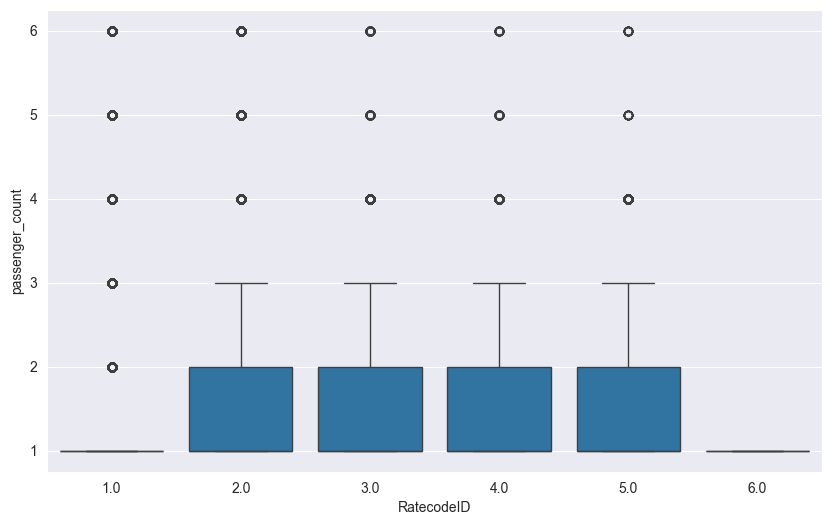

In [369]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
na_passengers = sampled_by_month_date_hour_df.copy()
print(sampled_by_month_date_hour_df['passenger_count'].unique())

plt.figure(figsize=(10, 6))
sns.boxplot(x='RatecodeID', y='passenger_count', data=sampled_by_month_date_hour_df)
na_passengers['passenger_count'] = (
    na_passengers
    .groupby('RatecodeID')['passenger_count']
    .transform(lambda x: x.mask(x.isna(), x.median()))
)
sampled_by_month_date_hour_df['passenger_count'] = na_passengers['passenger_count']
print((sampled_by_month_date_hour_df['passenger_count'].isna()).sum())

In [26]:
sampled_by_month_date_hour_df['passenger_count'].isna().size == sampled_by_month_date_hour_df['RatecodeID'].isna().size

True

Did you find zeroes in passenger_count? Handle these.

[1. 2. 3. 4. 6. 5.]
0


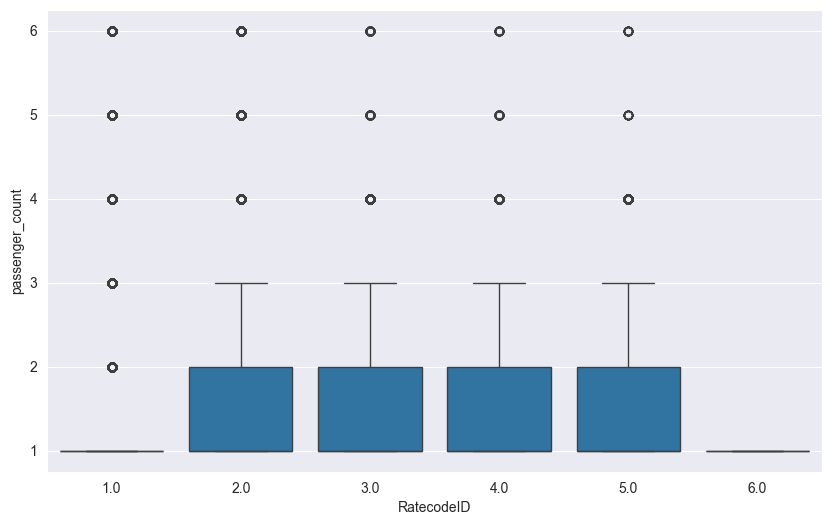

In [370]:
# Display the rows with zero values
# Impute 0 values in 'passenger_count'
zero_passengers = sampled_by_month_date_hour_df.copy()
print(sampled_by_month_date_hour_df['passenger_count'].unique())

plt.figure(figsize=(10, 6))
sns.boxplot(x='RatecodeID', y='passenger_count', data=sampled_by_month_date_hour_df)
zero_passengers['passenger_count'] = (
    zero_passengers
    .groupby('RatecodeID')['passenger_count']
    .transform(lambda x: x.mask(x == 0, x.median()))
)
sampled_by_month_date_hour_df['passenger_count'] = zero_passengers['passenger_count']
print((sampled_by_month_date_hour_df['passenger_count'] == 0.0).sum())

del zero_passengers

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [30]:
# Fix missing values in 'RatecodeID'
missing_rate_code_id = sampled_by_month_date_hour_df.copy()
#
ratecode_id_median = missing_rate_code_id['RatecodeID'].median()
missing_rate_code_id['RatecodeID'] = missing_rate_code_id['RatecodeID'].fillna(ratecode_id_median)

sampled_by_month_date_hour_df['RatecodeID'] = missing_rate_code_id['RatecodeID']
print(sampled_by_month_date_hour_df['RatecodeID'].unique())

del missing_rate_code_id

[ 1.  2.  4.  5. 99.  3.  6.]


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [365]:
# handle null values in congestion_surcharge

congestion_surcharge_df = sampled_by_month_date_hour_df.copy()
print(sampled_by_month_date_hour_df['congestion_surcharge'].unique())

print(congestion_surcharge_df['congestion_surcharge'].value_counts(dropna=False))
congestion_surcharge_median = congestion_surcharge_df['congestion_surcharge'].median()
print(congestion_surcharge_median)

congestion_surcharge_df['congestion_surcharge'] = congestion_surcharge_df['congestion_surcharge'].fillna(congestion_surcharge_median)
sampled_by_month_date_hour_df['congestion_surcharge'] = congestion_surcharge_df['congestion_surcharge']
print(sampled_by_month_date_hour_df['congestion_surcharge'].value_counts(dropna=False))

del congestion_surcharge_df

[2.5 0.  0.5]
congestion_surcharge
2.5    1752825
0.0     137377
0.5          1
Name: count, dtype: int64
2.5
congestion_surcharge
2.5    1752825
0.0     137377
0.5          1
Name: count, dtype: int64


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [368]:
# Handle any remaining missing values
missing_values = sampled_by_month_date_hour_df.copy()

neg_cols = [col for col in monetary_cols if (missing_values[col].isna()).any()]
print("Columns with missing values:", neg_cols)

print(missing_values['airport_fee'].value_counts(dropna=False))
# print(missing_values[missing_values['airport_fee'].isna()]['RatecodeID'].unique())
group_median = (
    missing_values
    .groupby('RatecodeID')['airport_fee']
    .median(numeric_only=True)
)
print(group_median)

def fill_airport_fee(row):
    if pd.isna(row['airport_fee']):
        return group_median.get(row['RatecodeID'], 0.0)
    else:
        return row['airport_fee']

missing_values['airport_fee'] = missing_values.apply(fill_airport_fee, axis=1)
sampled_by_month_date_hour_df['airport_fee'] = missing_values['airport_fee']
print(sampled_by_month_date_hour_df['airport_fee'].value_counts(dropna=False))
del missing_values


Columns with missing values: []
airport_fee
0.00    1730193
1.75     120392
1.25      39617
1.00          1
Name: count, dtype: int64
RatecodeID
1.0    0.00
2.0    1.75
3.0    0.00
4.0    1.75
5.0    0.00
6.0    0.00
Name: airport_fee, dtype: float64
airport_fee
0.00    1730193
1.75     120392
1.25      39617
1.00          1
Name: count, dtype: int64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

passenger_count
1.0    1406905
2.0     277298
3.0      69034
NaN      64874
4.0      38537
5.0      23871
6.0      15860
8.0         11
9.0          5
7.0          5
Name: count, dtype: int64


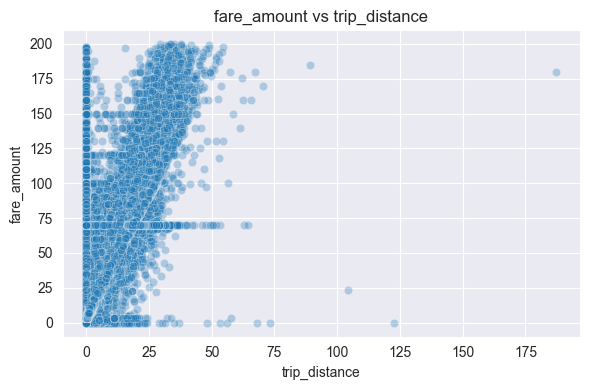

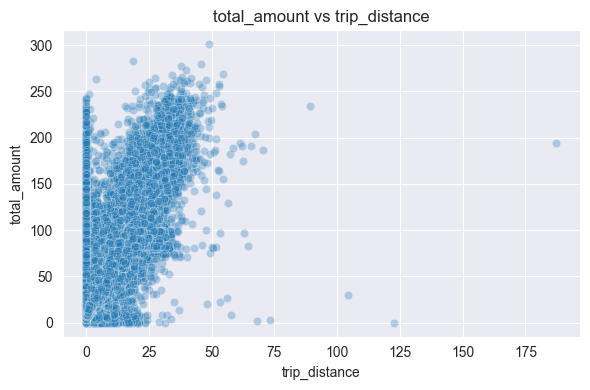

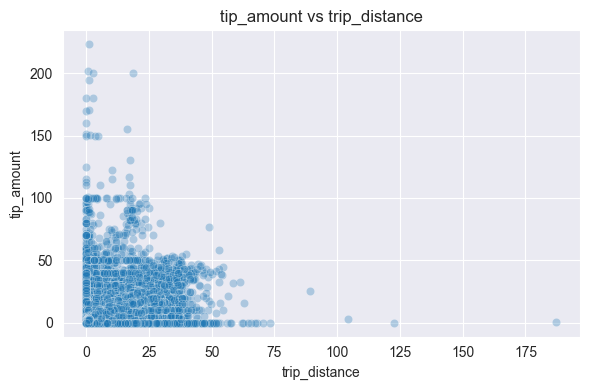

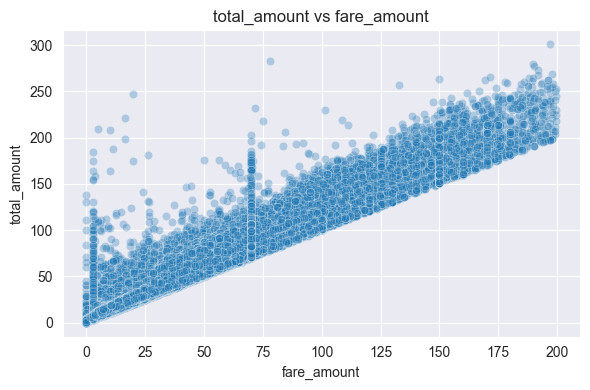

In [33]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
outlier_analysis = sampled_by_month_date_hour_df.copy()

print(outlier_analysis['passenger_count'].value_counts(dropna=False))

filtered = outlier_analysis[
    (outlier_analysis['trip_distance'] < 250) &
    (outlier_analysis['fare_amount'] < 200)
]

bivariate_pairs = [
    ('trip_distance', 'fare_amount'),
    ('trip_distance', 'total_amount'),
    ('trip_distance', 'tip_amount'),
    ('fare_amount', 'total_amount')
]

for x, y in bivariate_pairs:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=filtered[x], y=filtered[y], alpha=0.3)
    plt.title(f'{y} vs {x}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()
    plt.show()

# outlier_analysis[(outlier_analysis['PULocationID'] == outlier_analysis['DOLocationID']) & (anlysis_tmp_df['fare_amount'] > 100)]
#
# plt.figure(figsize=(6, 4))
# sns.scatterplot(x=outlier_analysis['trip_distance'], y=outlier_analysis['total_amount'])
# plt.title('total_amount vs trip_distance')
# plt.xlabel('trip_distance')
# plt.ylabel('total_amount')
# plt.tight_layout()
# plt.show()
#
#
# same_location = outlier_analysis[outlier_analysis['PULocationID'] == outlier_analysis['DOLocationID']]
# q1 = same_location['fare_amount'].quantile(0.25)
# q3 = same_location['fare_amount'].quantile(0.75)
# iqr = q3 - q1
# upper_bound = q3 + 1.5 * iqr
# print(upper_bound)
# # Outliers: unusually high fares for no-location-change
# bound_ = same_location[same_location['fare_amount'] > upper_bound]
# bound_

# outlier_analysis[(outlier_analysis['RatecodeID'] == 99)]
del outlier_analysis

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [371]:
# remove passenger_count > 6
outlier_passenger_count = sampled_by_month_date_hour_df.copy()
print(outlier_passenger_count['passenger_count'].value_counts(dropna=False))

outlier_passenger_count = outlier_passenger_count[outlier_passenger_count['passenger_count'] <= 6]
sampled_by_month_date_hour_df['passenger_count'] = outlier_passenger_count['passenger_count']

print(sampled_by_month_date_hour_df['passenger_count'].value_counts(dropna=False))
del outlier_passenger_count

passenger_count
1.0    1467719
2.0     276102
3.0      68700
4.0      37985
5.0      23847
6.0      15850
Name: count, dtype: int64
passenger_count
1.0    1467719
2.0     276102
3.0      68700
4.0      37985
5.0      23847
6.0      15850
Name: count, dtype: int64


In [ ]:
# Continue with outlier handling
# 1. Payment Type -> Fill with commonly used Payment type
# 2. For trip_distance is nearly 0 and fare_amount is more than 300 -> Drop these rows
# 3. trip_distance AND fare_amount AND total_amount are 0 AND the pickup and dropoff zones are different  -> Drop these rows
# 4. `trip_distance` is more than 250  miles.  -> Drop the rows

# Do any columns need standardising?
# 5. RatecodeID == 99 & trip_distance == 0.0 & fare_amount > 100 -> Drop tables
# 6. `RateCodeId` is 99 -> fill with median, since there is not airport_fee (meaning it cannot be RateCodeid 2 - for airport).
# 7. (for trip_distance == 0) & tip_amount > 50) & PULocationID == DOLocationID -> Cancelled tip, but the customer tipped the driver on humanitaria grounds, drop the rows
# 8. For same  pickup and dropoff zones there are high fare amount -> Find the upper bound for fare_amount in PULocationID == DOLocationID and drop the rows which are greater than the upper_bound


In [35]:
# 1. Payment Type -> Fill with commonly used Payment type
outlier_payment_type = sampled_by_month_date_hour_df.copy()

print(outlier_payment_type['payment_type'].value_counts(dropna=False))
payment_type__median = outlier_payment_type['payment_type'].median()
print(payment_type__median)

outlier_payment_type.loc[outlier_payment_type['payment_type'] == 0, 'payment_type'] = payment_type__median
sampled_by_month_date_hour_df['payment_type'] = outlier_payment_type['payment_type']
print(sampled_by_month_date_hour_df['payment_type'].value_counts(dropna=False))

del outlier_payment_type



payment_type
1    1492374
2     316452
0      64874
4      13685
3       9015
Name: count, dtype: int64
1.0
payment_type
1    1557248
2     316452
4      13685
3       9015
Name: count, dtype: int64


In [36]:
# 2. For trip_distance is nearly 0 and fare_amount is more than 300 -> Drop these rows
sampled_by_month_date_hour_df.info()
outlier_trip_distance_zero_suspicious_high_fare_amount = sampled_by_month_date_hour_df.copy()

outlier_trip_distance_zero_suspicious_high_fare_amount = outlier_trip_distance_zero_suspicious_high_fare_amount[
    ~(
        (outlier_trip_distance_zero_suspicious_high_fare_amount['trip_distance'] < 1.0) &
        (outlier_trip_distance_zero_suspicious_high_fare_amount['fare_amount'] > 300)
    )
]

sampled_by_month_date_hour_df = outlier_trip_distance_zero_suspicious_high_fare_amount
del outlier_trip_distance_zero_suspicious_high_fare_amount
sampled_by_month_date_hour_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  date                   object        
 18  hour                  

In [37]:
# 3. trip_distance AND fare_amount AND the pickup and dropoff zones are different  -> Drop these rows
sampled_by_month_date_hour_df.info()
outlier_td_fa_ta_zero_po_do_diff = sampled_by_month_date_hour_df.copy()
outlier_td_fa_ta_zero_po_do_diff = outlier_td_fa_ta_zero_po_do_diff[
    ~(
        (outlier_td_fa_ta_zero_po_do_diff['trip_distance'] == 0.0) &
        (outlier_td_fa_ta_zero_po_do_diff['fare_amount'] == 0.0) &
        (outlier_td_fa_ta_zero_po_do_diff['PULocationID'] != outlier_td_fa_ta_zero_po_do_diff['DOLocationID'])
    )
]
sampled_by_month_date_hour_df = outlier_td_fa_ta_zero_po_do_diff
del outlier_td_fa_ta_zero_po_do_diff
sampled_by_month_date_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896362 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  date                   object        
 18  hour                   int3

In [38]:
# 4. `trip_distance` is more than 250  miles.  -> Drop the rows
sampled_by_month_date_hour_df.info()
outlier_too_long_td = sampled_by_month_date_hour_df.copy()

outlier_too_long_td = outlier_too_long_td[
    ~(
        (outlier_too_long_td['trip_distance'] > 250)
    )
]

sampled_by_month_date_hour_df = outlier_too_long_td
del outlier_too_long_td
sampled_by_month_date_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896299 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  date                   object        
 18  hour                   int3

In [353]:
del outlier_too_long_td
sampled_by_month_date_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896253 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  date                   object        
 18  hour                   int3

In [39]:
# 5. RatecodeID == 99 & trip_distance == 0.0 & fare_amount > 100 -> Drop tables

sampled_by_month_date_hour_df.info()
outlier_rate_td_fa = sampled_by_month_date_hour_df.copy()

outlier_rate_td_fa = outlier_rate_td_fa[
    ~(
        (outlier_rate_td_fa['RatecodeID'] == 99) &
        (outlier_rate_td_fa['trip_distance'] == 0.0) &
        (outlier_rate_td_fa['fare_amount'] > 100 )
    )
]

sampled_by_month_date_hour_df = outlier_rate_td_fa
del outlier_rate_td_fa
sampled_by_month_date_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896253 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  date                   object        
 18  hour                   int3

In [40]:
# 6. `RateCodeId` is 99 -> fill with median, since there is not airport_fee (meaning it cannot be RateCodeid 2 - for airport).

print(sampled_by_month_date_hour_df['RatecodeID'].value_counts(dropna=False))

outlier_rate_code = sampled_by_month_date_hour_df.copy()
rate_code_median = outlier_rate_code['RatecodeID'].median()
print(rate_code_median)

outlier_rate_code.loc[outlier_rate_code['RatecodeID'] == 99.0, 'RatecodeID'] = rate_code_median
sampled_by_month_date_hour_df['RatecodeID'] = outlier_rate_code['RatecodeID']

del outlier_rate_code
print(sampled_by_month_date_hour_df['RatecodeID'].value_counts(dropna=False))

RatecodeID
1.0     1794052
2.0       71667
99.0      10453
5.0       10222
3.0        6124
4.0        3723
6.0           3
Name: count, dtype: int64
1.0
RatecodeID
1.0    1804505
2.0      71667
5.0      10222
3.0       6124
4.0       3723
6.0          3
Name: count, dtype: int64


In [41]:
# 7. (for trip_distance == 0) & tip_amount > 50) & PULocationID == DOLocationID -> Cancelled tip, but the customer tipped the driver on humanitaria grounds, drop the rows

sampled_by_month_date_hour_df.info()
outlier_humanitarian_ground = sampled_by_month_date_hour_df.copy()

outlier_humanitarian_ground = outlier_humanitarian_ground[
    ~(
        (outlier_humanitarian_ground['trip_distance'] == 0.0) &
        (outlier_humanitarian_ground['tip_amount'] > 50) &
        (outlier_humanitarian_ground['PULocationID'] == outlier_humanitarian_ground['DOLocationID'])
    )
]

sampled_by_month_date_hour_df = outlier_humanitarian_ground
del outlier_humanitarian_ground
sampled_by_month_date_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896244 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  date                   object        
 18  hour                   int3

In [42]:
# 8. For same pickup and dropoff zones there are high fare amount -> Find the upper bound for fare_amount in PULocationID == DOLocationID and drop the rows which are greater than the upper_bound

sampled_by_month_date_hour_df.info()
outlier_humanitarian_ground_total_amount = sampled_by_month_date_hour_df.copy()

same_location = outlier_humanitarian_ground_total_amount[outlier_humanitarian_ground_total_amount['PULocationID'] == outlier_humanitarian_ground_total_amount['DOLocationID']]
q1 = same_location['fare_amount'].quantile(0.25)
q3 = same_location['fare_amount'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
print(upper_bound)

outlier_humanitarian_ground_total_amount = outlier_humanitarian_ground_total_amount[
    ~(
        (outlier_humanitarian_ground_total_amount['trip_distance'] == 0.0) &
        (outlier_humanitarian_ground_total_amount['fare_amount'] > upper_bound) &
        (outlier_humanitarian_ground_total_amount['PULocationID'] == outlier_humanitarian_ground_total_amount['DOLocationID'])
    )
]

sampled_by_month_date_hour_df = outlier_humanitarian_ground_total_amount
del outlier_humanitarian_ground_total_amount
sampled_by_month_date_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896175 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  date                   object        
 18  hour                   int3

In [46]:
# Store the cleaned data in file
file_path = loaded_data_path.replace('sampled', 'cleaned')
print(file_path)

sampled_by_month_date_hour_df.to_parquet(file_path)
del sampled_by_month_date_hour_df

/Users/jagdshlk/Documents/Projects/Masters_AI_ML/ml-ai-playgrounds/EDA/Assignment/Datasets_and_Dictionary/trip_records/cleaned_20250621_161613.parquet


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [5]:
cleaned_file_path = f'{project_directory}/EDA/Assignment/Datasets_and_Dictionary/trip_records/cleaned_20250621_161613.parquet'
cleaned_and_sampled_by_month_date_hour_df = pd.read_parquet(cleaned_file_path)
cleaned_and_sampled_by_month_date_hour_df['day_of_the_week'] = pd.to_datetime(cleaned_and_sampled_by_month_date_hour_df['date']).dt.day_name()
cleaned_and_sampled_by_month_date_hour_df['month'] = pd.to_datetime(cleaned_and_sampled_by_month_date_hour_df['date']).dt.month_name()

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: DateTime Variable
* `tpep_dropoff_datetime`: DateTime Variable
* `passenger_count`: Categorical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Numerical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?
 Answer: **All are numerical**

* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

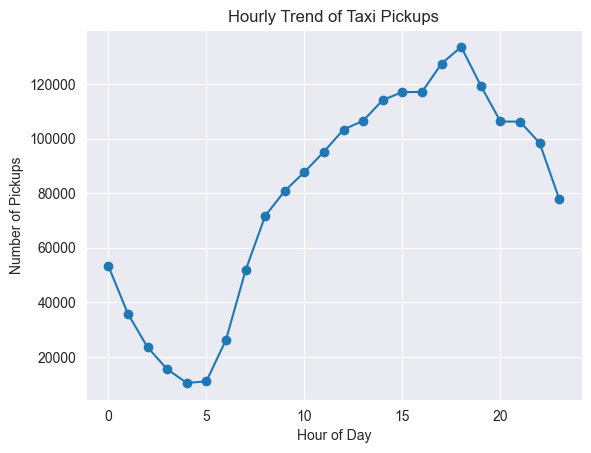

In [74]:
# Find and show the hourly trends in taxi pickups

hourly_counts = cleaned_and_sampled_by_month_date_hour_df['hour'].value_counts().sort_index()
plt.plot(hourly_counts.index, hourly_counts.sort_values, marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.title('Hourly Trend of Taxi Pickups')
plt.grid(True)
plt.show()

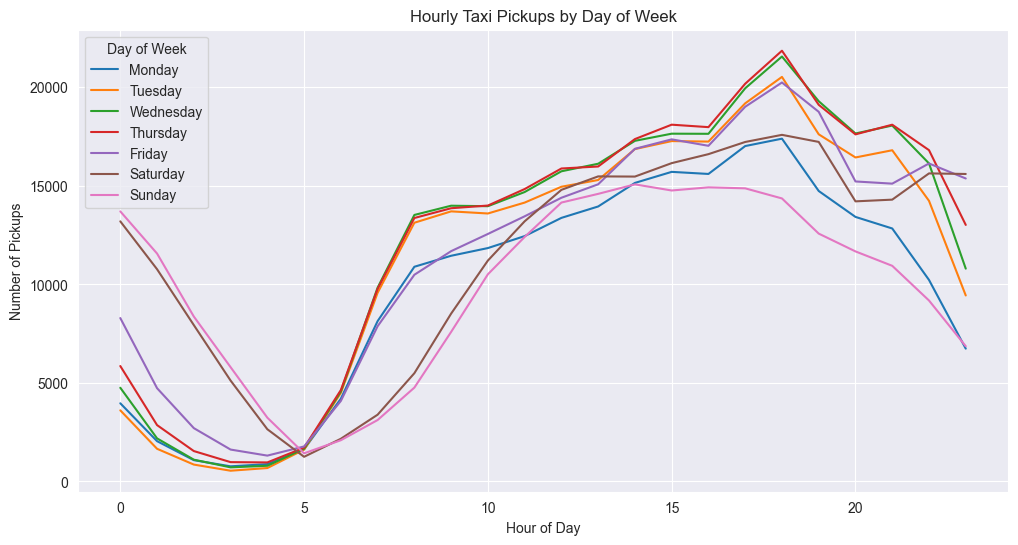

In [75]:
# Find and show the daily trends in taxi pickups (days of the week)
day_of_week_trend_analysis = cleaned_and_sampled_by_month_date_hour_df.copy()

grouped = day_of_week_trend_analysis.groupby(['day_of_the_week', 'hour']).size().reset_index(name='pickup_count')

# In order to ordr the day of the week correctly, use
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped['day_of_the_week'] = pd.Categorical(grouped['day_of_the_week'], days_order)

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='hour', y='pickup_count', hue='day_of_the_week')
plt.title('Hourly Taxi Pickups by Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.legend(title='Day of Week')
plt.grid(True)
plt.show()

del day_of_week_trend_analysis

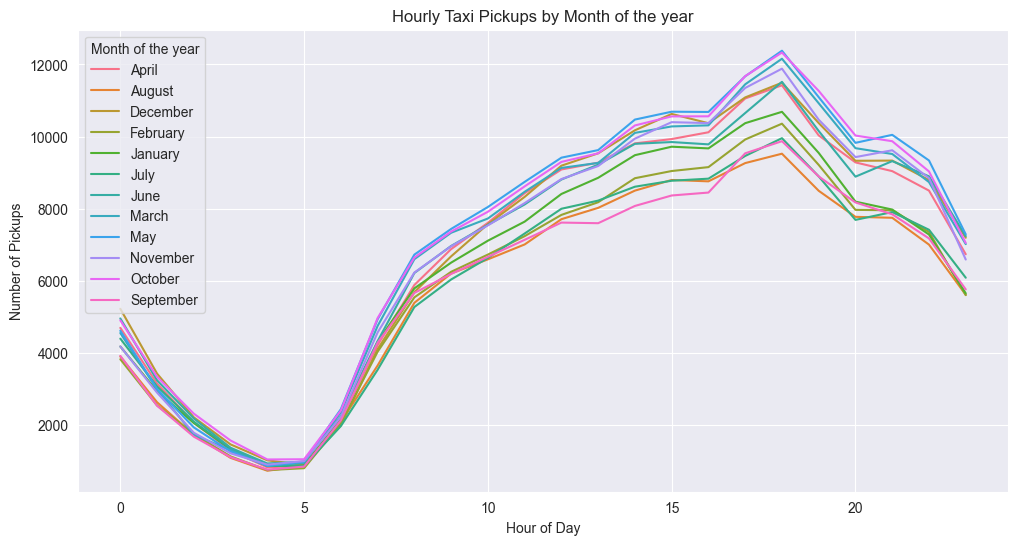

In [76]:
# Show the monthly trends in pickups
monthly_trend_analysis = cleaned_and_sampled_by_month_date_hour_df.copy()

monthly_trend_analysis['month'] = pd.to_datetime(monthly_trend_analysis['date']).dt.month_name()

grouped = monthly_trend_analysis.groupby(['month', 'hour']).size().reset_index(name='pickup_count')

# In order to ordr the day of the week correctly, use
# days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# grouped['day_of_the_week'] = pd.Categorical(grouped['day_of_the_week'], days_order)

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='hour', y='pickup_count', hue='month')
plt.title('Hourly Taxi Pickups by Month of the year')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.legend(title='Month of the year')
plt.grid(True)
plt.show()

del monthly_trend_analysis


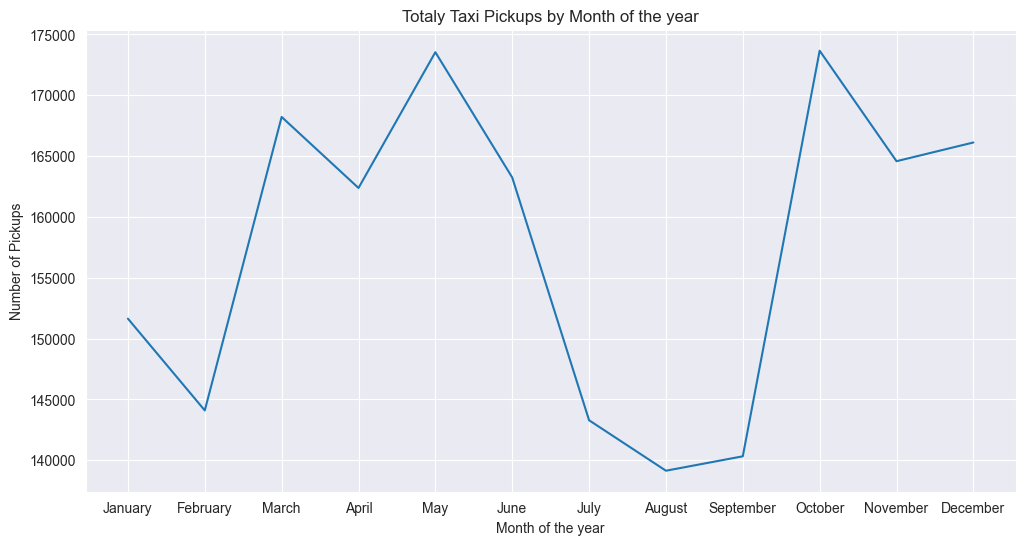

In [77]:
# Show the monthly trends in pickups
monthly_trend_analysis = cleaned_and_sampled_by_month_date_hour_df.copy()

grouped = monthly_trend_analysis.groupby(['month']).size().reset_index(name='pickup_count')

# In order to ordr the day of the week correctly, use
month_names = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
grouped['month'] = pd.Categorical(grouped['month'], month_names)

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='month', y='pickup_count')
plt.title('Totaly Taxi Pickups by Month of the year')
plt.xlabel('Month of the year')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.show()

del monthly_trend_analysis

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [78]:
# Analyse the above parameters
finacial_value = ['fare_amount', 'tip_amount', 'total_amount','trip_distance']

neg_cols = [col for col in finacial_value if (cleaned_and_sampled_by_month_date_hour_df[col] < 0).any()]
print("Columns with negative values:", neg_cols)

neg_cols = [col for col in finacial_value if (cleaned_and_sampled_by_month_date_hour_df[col] == 0).any()]
print("Columns with Zero values:", neg_cols)


Columns with negative values: []
Columns with Zero values: ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [79]:
# Create a df with non zero entries for the selected parameters.
cleaned_and_sampled_by_month_date_hour_df.info()
non_zero_values_df = cleaned_and_sampled_by_month_date_hour_df.copy()
original_rows = len(non_zero_values_df)

for col in finacial_value:
    non_zero_values_df = non_zero_values_df[non_zero_values_df[col] > 0]

filtered_rows = len(non_zero_values_df)
print(f"Total rows removed: {original_rows - filtered_rows}")
non_zero_values_df.info()
del non_zero_values_df


<class 'pandas.core.frame.DataFrame'>
Index: 1890203 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  date                   object        
 18  hour                   int3

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

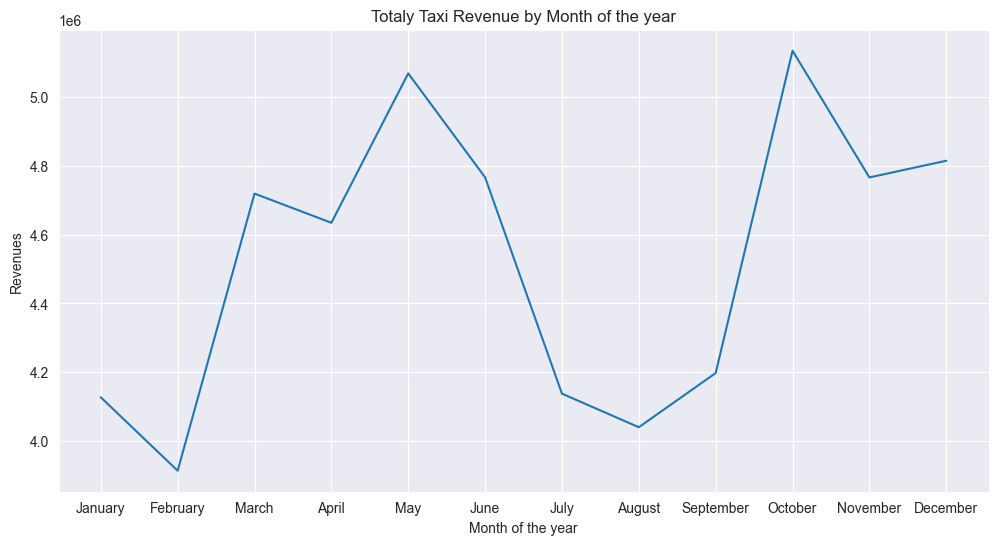

In [80]:
# Group data by month and analyse monthly revenue

monthly_revenue_trend_analysis = cleaned_and_sampled_by_month_date_hour_df.copy()

grouped_revenue = monthly_revenue_trend_analysis.groupby(['month'])['total_amount'].sum().reset_index(name='total_revenue')

# Ewuse the month_names from previous cell
grouped_revenue['month'] = pd.Categorical(grouped['month'], month_names)

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_revenue, x='month', y='total_revenue')
plt.title('Totaly Taxi Revenue by Month of the year')
plt.xlabel('Month of the year')
plt.ylabel('Revenues')
plt.grid(True)
plt.show()

del monthly_revenue_trend_analysis


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

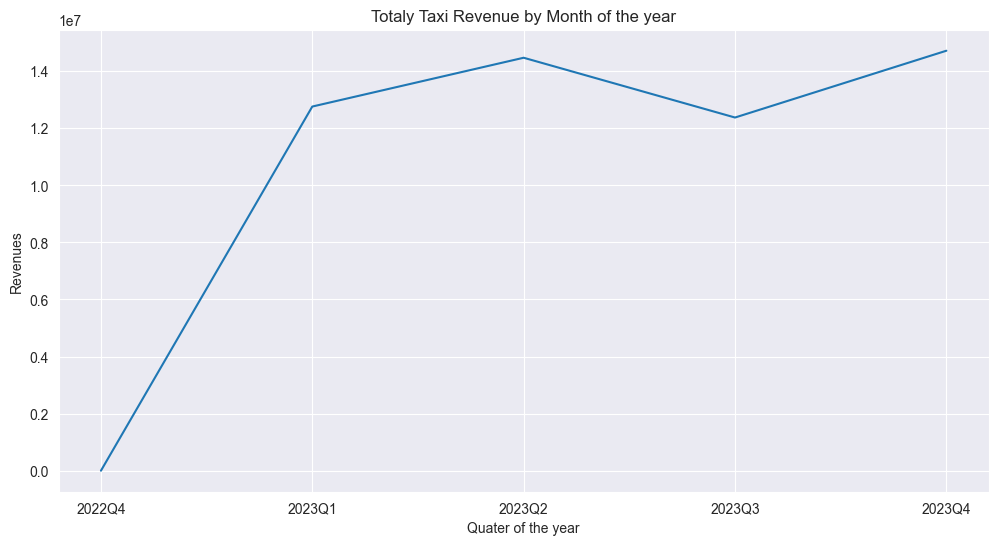

  quarter  total_revenue    proportion  proportion_percent
0  2022Q4          13.50  2.485134e-07                0.00
1  2023Q1    12760348.78  2.348976e-01               23.49
2  2023Q2    14470451.49  2.663778e-01               26.64
3  2023Q3    12375679.40  2.278164e-01               22.78
4  2023Q4    14716537.54  2.709079e-01               27.09


In [83]:
# Calculate proportion of each quarter
quaterly_revenue_trend_analysis = cleaned_and_sampled_by_month_date_hour_df.copy()

quaterly_revenue_trend_analysis['quarter'] = pd.to_datetime(quaterly_revenue_trend_analysis['date']).dt.to_period('Q').astype(str)

quarterly_revenue = quaterly_revenue_trend_analysis.groupby(['quarter'])['total_amount'].sum().reset_index(name='total_revenue')

plt.figure(figsize=(12, 6))
sns.lineplot(data=quarterly_revenue, x='quarter', y='total_revenue')
plt.title('Total Taxi Revenue by Month of the year')
plt.xlabel('Quater of the year')
plt.ylabel('Revenues')
plt.grid(True)
plt.show()

total_revenue = quarterly_revenue['total_revenue'].sum()
quarterly_revenue['proportion'] = quarterly_revenue['total_revenue'] / total_revenue
quarterly_revenue['proportion_percent'] = (quarterly_revenue['proportion'] * 100).round(2)
print(quarterly_revenue)

del quaterly_revenue_trend_analysis


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

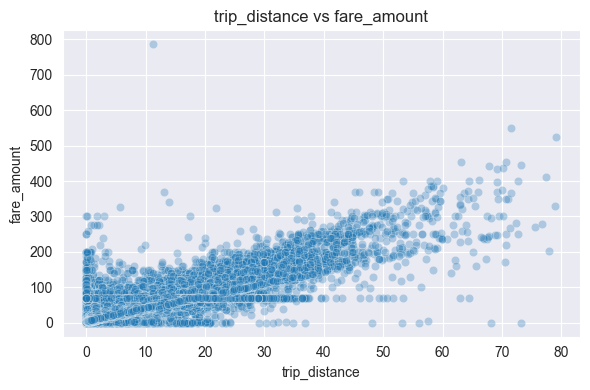

Correlation between trip distance and fare amount: 0.9436


In [94]:
# Show how trip fare is affected by distance

trip_fare_correlation_df = cleaned_and_sampled_by_month_date_hour_df.copy()
trip_fare_correlation_df = trip_fare_correlation_df[
    (trip_fare_correlation_df['trip_distance'] > 0) &
    (trip_fare_correlation_df['trip_distance'] < 80)
]

plt.figure(figsize=(6, 4))
sns.scatterplot(data=trip_fare_correlation_df,x=trip_fare_correlation_df['trip_distance'], y=trip_fare_correlation_df['fare_amount'], alpha=0.3)
plt.title('trip_distance vs fare_amount')
plt.xlabel('trip_distance')
plt.ylabel('fare_amount')
plt.tight_layout()
plt.show()

correlation = trip_fare_correlation_df['trip_distance'].corr(trip_fare_correlation_df['fare_amount'])
print(f"Correlation between trip distance and fare amount: {correlation:.4f}")

del trip_fare_correlation_df


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

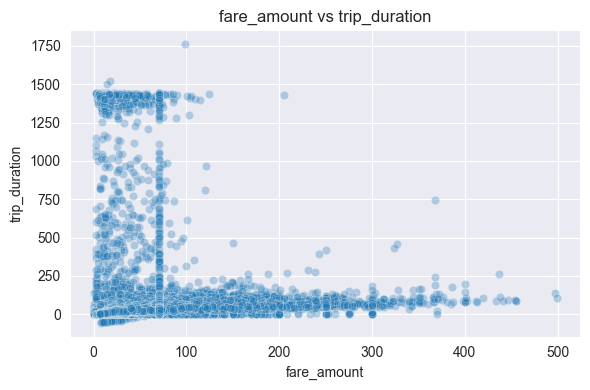

Correlation between passenger_count and fare amount: 0.0428


In [106]:
# Show relationship between fare and trip duration
trip_duration_fare_df = cleaned_and_sampled_by_month_date_hour_df.copy()

trip_duration_fare_df['trip_duration'] = (trip_duration_fare_df['tpep_dropoff_datetime'] - trip_duration_fare_df['tpep_pickup_datetime']).dt.total_seconds() / 60

trip_duration_fare_df = trip_duration_fare_df[
    (trip_duration_fare_df['fare_amount'] > 0) &
    (trip_duration_fare_df['fare_amount'] < 500) &
    (trip_duration_fare_df['trip_duration'] < 2000)
]

plt.figure(figsize=(6, 4))
sns.scatterplot(data=trip_duration_fare_df,x=trip_duration_fare_df['fare_amount'], y=trip_duration_fare_df['trip_duration'], alpha=0.3)
plt.title('fare_amount vs trip_duration')
plt.xlabel('fare_amount')
plt.ylabel('trip_duration')
plt.tight_layout()
plt.show()

correlation = trip_duration_fare_df['passenger_count'].corr(trip_duration_fare_df['fare_amount'])
print(f"Correlation between passenger_count and fare amount: {correlation:.4f}")

del trip_duration_fare_df


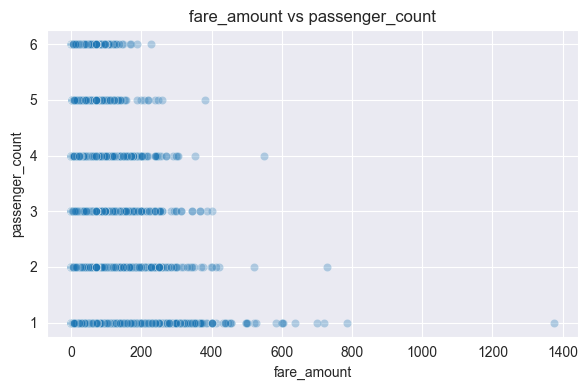

Correlation between trip distance and fare amount: 0.0426


In [97]:
# Show relationship between fare and number of passengers
trip_fare_passenger_correlation_df = cleaned_and_sampled_by_month_date_hour_df.copy()

plt.figure(figsize=(6, 4))
sns.scatterplot(data=trip_fare_passenger_correlation_df,x=trip_fare_passenger_correlation_df['fare_amount'], y=trip_fare_passenger_correlation_df['passenger_count'], alpha=0.3)
plt.title('fare_amount vs passenger_count')
plt.xlabel('fare_amount')
plt.ylabel('passenger_count')
plt.tight_layout()
plt.show()

correlation = trip_fare_passenger_correlation_df['passenger_count'].corr(trip_fare_passenger_correlation_df['fare_amount'])
print(f"Correlation between passenger_count and fare amount: {correlation:.4f}")

del trip_fare_passenger_correlation_df


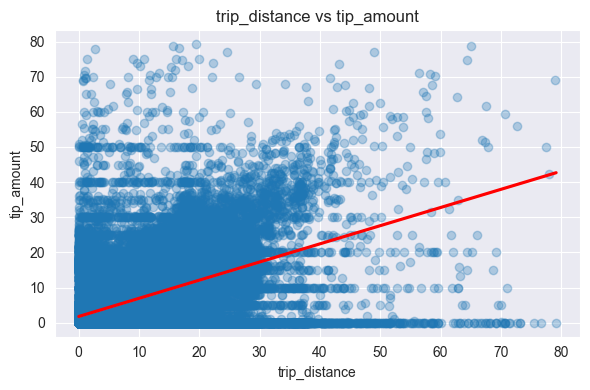

Correlation between trip_distance and tip_amount: 0.5968


In [115]:
# Show relationship between tip and trip distance

trip_tip_correlation_df = cleaned_and_sampled_by_month_date_hour_df.copy()

trip_tip_correlation_df = trip_tip_correlation_df[
    (trip_tip_correlation_df['trip_distance'] > 0) &
    (trip_tip_correlation_df['trip_distance'] < 80) &
    (trip_tip_correlation_df['tip_amount'] < 80)
]

plt.figure(figsize=(6, 4))
sns.regplot(data=trip_tip_correlation_df,x=trip_tip_correlation_df['trip_distance'], y=trip_tip_correlation_df['tip_amount'], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('trip_distance vs tip_amount')
plt.xlabel('trip_distance')
plt.ylabel('tip_amount')
plt.tight_layout()
plt.show()

correlation = trip_tip_correlation_df['trip_distance'].corr(trip_tip_correlation_df['tip_amount'])
print(f"Correlation between trip_distance and tip_amount: {correlation:.4f}")

del trip_tip_correlation_df

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

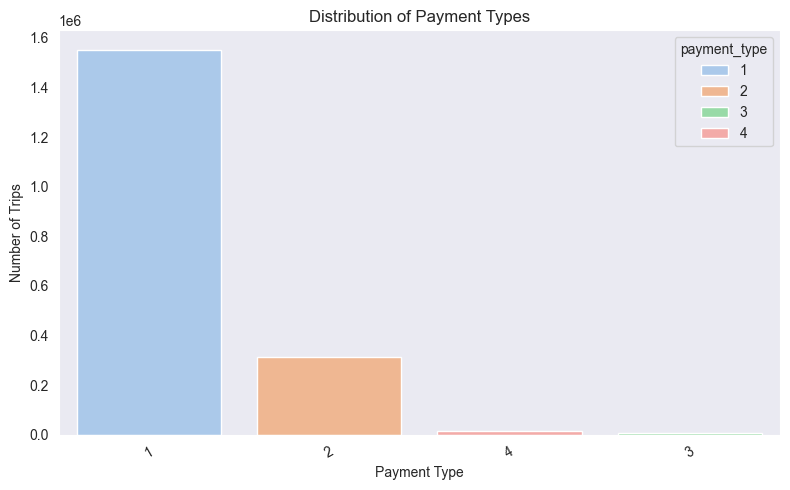

In [108]:
# Analyse the distribution of different payment types (payment_type).

payment_type_correlation_df = cleaned_and_sampled_by_month_date_hour_df.copy()

plt.figure(figsize=(8, 5))
sns.countplot(data=payment_type_correlation_df, x='payment_type', order=payment_type_correlation_df['payment_type'].value_counts().index, palette='pastel', hue='payment_type')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

del payment_type_correlation_df


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [110]:
%pip install geopandas

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.7/20.7 MB 45.4 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 28.2 MB/s eta 0:00:00
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/h

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [18]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file(f'{project_directory}/EDA/Assignment/Datasets_and_Dictionary/taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

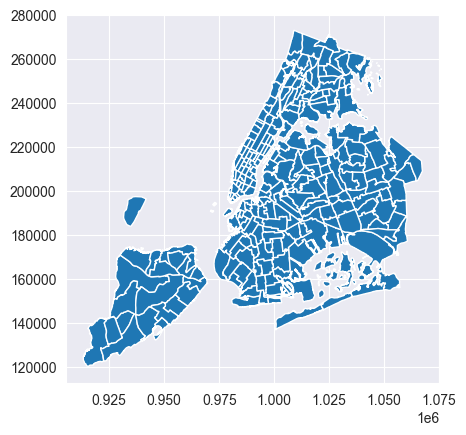

In [112]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [324]:
# Merge zones and trip records using locationID and PULocationID
zone_merged_df = cleaned_and_sampled_by_month_date_hour_df.copy()

merged_df = zone_merged_df.merge(
    zones,
    how='inner',
    left_on='PULocationID',
    right_on='LocationID'
)
merged_df


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   
1               2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
2               2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
3               2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
4               2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
...           ...                  ...                   ...              ...   
1872258         2  2023-12-31 23:44:09   2023-12-31 23:50:04              1.0   
1872259         2  2023-12-31 23:44:04   2024-01-01 00:03:36              1.0   
1872260         2  2023-12-31 23:37:20   2023-12-31 23:41:18              1.0   
1872261         1  2023-12-31 23:12:30   2023-12-31 23:21:12              NaN   
1872262         2  2023-12-31 23:35:11   2024-01-01 00:15:03              5.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0                 0.86         1.0           141           140             1   
1                 7.74         1.0           138           256             2   
2                 1.24         1.0           161           237             1   
3                 1.44         1.0           237           141             2   
4                 0.54         1.0           143           142             2   
...                ...         ...           ...           ...           ...   
1872258           0.81         1.0           263           262             1   
1872259           5.78         1.0           161           261             1   
1872260           1.06         1.0            79           137             1   
1872261           0.00         1.0           166           244             1   
1872262           8.45         1.0           142           261             2   

         fare_amount  ...  airport_fee  day_of_the_week     month  OBJECTID  \
0               6.50  ...         0.00         Saturday  December       141   
1              32.40  ...         1.25           Sunday   January       138   
2               7.90  ...         0.00           Sunday   January       161   
3              11.40  ...         0.00           Sunday   January       237   
4               6.50  ...         0.00           Sunday   January       143   
...              ...  ...          ...              ...       ...       ...   
1872258         7.20  ...         0.00           Sunday  December       263   
1872259        27.50  ...         0.00           Sunday  December       161   
1872260         7.20  ...         0.00           Sunday  December        79   
1872261        14.64  ...         0.00           Sunday  December       166   
1872262        40.80  ...         0.00           Sunday  December       142   

         Shape_Leng  Shape_Area                   zone LocationID    borough  \
0          0.041514    0.000077        Lenox Hill West        141  Manhattan   
1          0.107467    0.000537      LaGuardia Airport        138     Queens   
2          0.035804    0.000072         Midtown Center        161  Manhattan   
3          0.042213    0.000096  Upper East Side South        237  Manhattan   
4          0.054180    0.000151    Lincoln Square West        143  Manhattan   
...             ...         ...                    ...        ...        ...   
1872258    0.037017    0.000066         Yorkville West        263  Manhattan   
1872259    0.035804    0.000072         Midtown Center        161  Manhattan   
1872260    0.042625    0.000108           East Village         79  Manhattan   
1872261    0.068824    0.000255    Morningside Heights        166  Manhattan   
1872262    0.038176    0.000076    Lincoln Square East        142  Manhattan   

                                                  geometry  
0        POLYGON ((994839.073 216123.698, 994786.74 216...  
1        MULTIPOLYGON (((1019904.219 225677

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [325]:
# Group data by location and calculate the number of trips
grouped_by_locationId = merged_df.groupby(['LocationID']).size().reset_index(name='location_count').sort_values('location_count', ascending=False)
grouped_by_locationId


LocationID  location_count
124         132           96308
228         237           88532
153         161           87448
227         236           79691
154         162           66621
..          ...             ...
81           84               1
102         109               1
107         115               1
164         172               1
236         245               1

[255 rows x 2 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [331]:
# Merge trip counts back to the zones GeoDataFrame
merged_zone_count_df = zones.merge(
    grouped_by_locationId,
    how='left',
    left_on='LocationID',
    right_on='LocationID'
)
merged_zone_count_df[['LocationID','zone', 'location_count']].sort_values(by='location_count', ascending=False)



LocationID                                           zone  location_count
131         132                                    JFK Airport         96308.0
236         237                          Upper East Side South         88532.0
160         161                                 Midtown Center         87448.0
235         236                          Upper East Side North         79691.0
161         162                                   Midtown East         66621.0
..          ...                                            ...             ...
102         103  Governor's Island/Ellis Island/Liberty Island             NaN
103         103  Governor's Island/Ellis Island/Liberty Island             NaN
104         103  Governor's Island/Ellis Island/Liberty Island             NaN
109         110                               Great Kills Park             NaN
175         176                                        Oakwood             NaN

[263 rows x 3 columns]

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

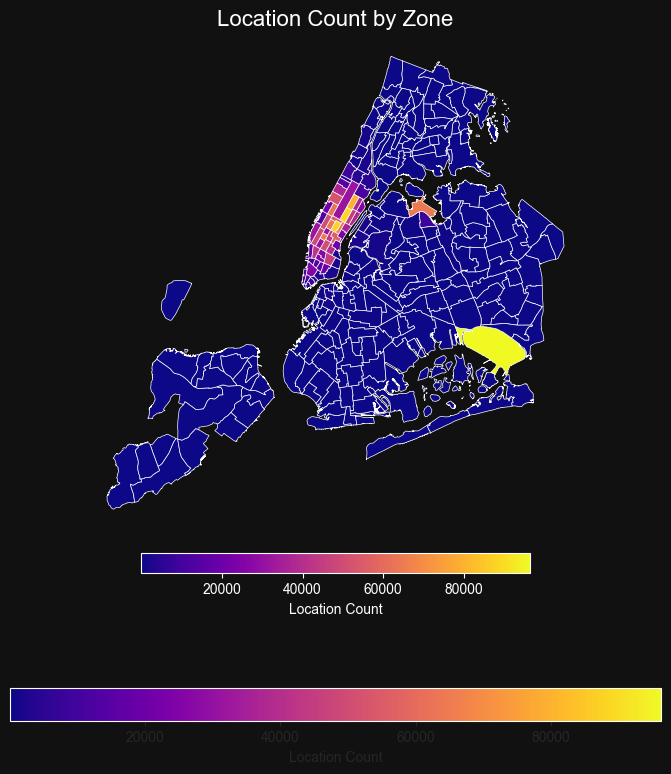

In [345]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
ax.set_facecolor("#111111")  # set very dark gray for visible
fig.patch.set_facecolor("#111111")
merged_zone_count_df.plot(
    column = 'location_count',
    ax = ax,
    cmap='plasma',
    linewidth=0.5,
    edgecolor='white',
    legend = True,
    legend_kwds = { 'label': "Location Count", 'orientation': "horizontal", 'shrink': 0.7},
)

# Add colorbar manually
norm = mpl.colors.Normalize(
    vmin=merged_zone_count_df['location_count'].min(),
    vmax=merged_zone_count_df['location_count'].max()
)

sm = mpl.cm.ScalarMappable(cmap='plasma', norm=norm)
sm._A = []  # required workaround for colorbar

cbar = fig.colorbar(
    sm,
    ax=ax,
    orientation='horizontal',
    fraction=0.036,
    pad=0.04
)

# Style the colorbar ticks and label
cbar.set_label('Location Count', color='white')
cbar.ax.xaxis.set_tick_params(color='white')
plt.setp(plt.getp(cbar.ax.axes, 'xticklabels'), color='white')


ax.set_title("Location Count by Zone", color='white', fontsize=16)
ax.set_axis_off()
plt.show()

In [349]:
# can you try displaying the zones DF sorted by the number of trips?
sort_values = merged_zone_count_df.sort_values('location_count', ascending=False)
print(sort_values[['zone', 'borough', 'location_count']].head(20))

                             zone    borough  location_count
131                   JFK Airport     Queens         96308.0
236         Upper East Side South  Manhattan         88532.0
160                Midtown Center  Manhattan         87448.0
235         Upper East Side North  Manhattan         79691.0
161                  Midtown East  Manhattan         66621.0
137             LaGuardia Airport     Queens         64220.0
185  Penn Station/Madison Sq West  Manhattan         64203.0
141           Lincoln Square East  Manhattan         62584.0
229     Times Sq/Theatre District  Manhattan         62467.0
169                   Murray Hill  Manhattan         55807.0
162                 Midtown North  Manhattan         54743.0
238         Upper West Side South  Manhattan         52609.0
233                      Union Sq  Manhattan         50736.0
47                   Clinton East  Manhattan         50175.0
67                   East Chelsea  Manhattan         49177.0
78                   Eas

In [ ]:
del merged_zone_count_df
del grouped_by_locationId
del merged_df

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [38]:
# Step 1: Project zones and get centroids
zones_gdf_proj = zones.to_crs(epsg=2263)
zone_centroids = zones_gdf_proj.set_index('LocationID').geometry.centroid

# Step 2: Copy and compute trip duration in hours
slow_routes_df = cleaned_and_sampled_by_month_date_hour_df.copy()
slow_routes_df['trip_duration'] = (
    slow_routes_df['tpep_dropoff_datetime'] - slow_routes_df['tpep_pickup_datetime']
).dt.total_seconds() / 3600
slow_routes_df = slow_routes_df[slow_routes_df['trip_duration'] > 0.0]

# Step 3: Define distance calculation function
def get_centroid_distance(row):
    pu = row['PULocationID']
    do = row['DOLocationID']

    # Ensure both pickup and dropoff locations exist
    if pd.notna(pu) and pd.notna(do) and pu in zone_centroids.index and do in zone_centroids.index:
        return zone_centroids.loc[pu].distance(zone_centroids.loc[do]) / 1000  # in km
    return None

# Step 4: Apply distance calculation
slow_routes_df['total_distance'] = slow_routes_df.apply(get_centroid_distance, axis=1)
slow_routes_df = slow_routes_df[slow_routes_df['total_distance'].notnull()]

# Step 5: Compute average speed
slow_routes_df['average_speed'] = slow_routes_df['total_distance'] / slow_routes_df['trip_duration']

# Optional cleanup: remove speeds above 100 km/h
slow_routes_df = slow_routes_df[slow_routes_df['average_speed'] < 100]
#
# # Step 6: Sort and display slowest routes
# slowest_routes = slow_routes_df.sort_values('average_speed', ascending=True)
# slowest_routes
# Preview slowest 10
# print(slowest_routes[['PULocationID', 'DOLocationID', 'trip_duration', 'total_distance', 'average_speed']].head(10))


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/qs/sgc9zfnx61x03c_j3pcl5qyh0000gn/T/ipykernel_42974/2008891126.py", line 30, in <module>
    slow_routes_df = slow_routes_df[slow_routes_df['average_speed'] < 100]
  File "/usr/local/lib/python3.9/site-packages/pandas/core/ops/common.py", line 76, in new_method
    return method(self, other)
  File "/usr/local/lib/python3.9/site-packages/pandas/core/arraylike.py", line 48, in __lt__
    return self._cmp_method(other, operator.lt)
  File "/usr/local/lib/python3.9/site-packages/pandas/core/series.py", line 6119, in _cmp_method
    res_values = ops.comparison_op(lvalues, rvalues, op)
  File "/usr/local/lib/python3.9/site-packages/pandas/core/ops/array_ops.py", line 344, in comparison_op
    res_values = comp_method_OBJECT_ARRAY(op, lvalues, rvalues)
  File "/usr/local/lib/pytho

In [ ]:
slowest_routes_by_hour = (
    slow_routes_counts_1
    .groupby(['hour', 'PULocationID', 'DOLocationID'])
    .agg(
        average_speed=('average_speed', 'mean'),
        trip_count=('average_speed', 'count')
    )
    .reset_index()
)

# slowest_per_hour = (
#     slowest_routes_by_hour
#     .sort_values(by=['hour', 'average_speed'])
#     .groupby('hour')
#     .first()
#     .reset_index()
# )
# slowest_per_hour

# del slow_routes_counts
# del slow_routes_counts_1

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

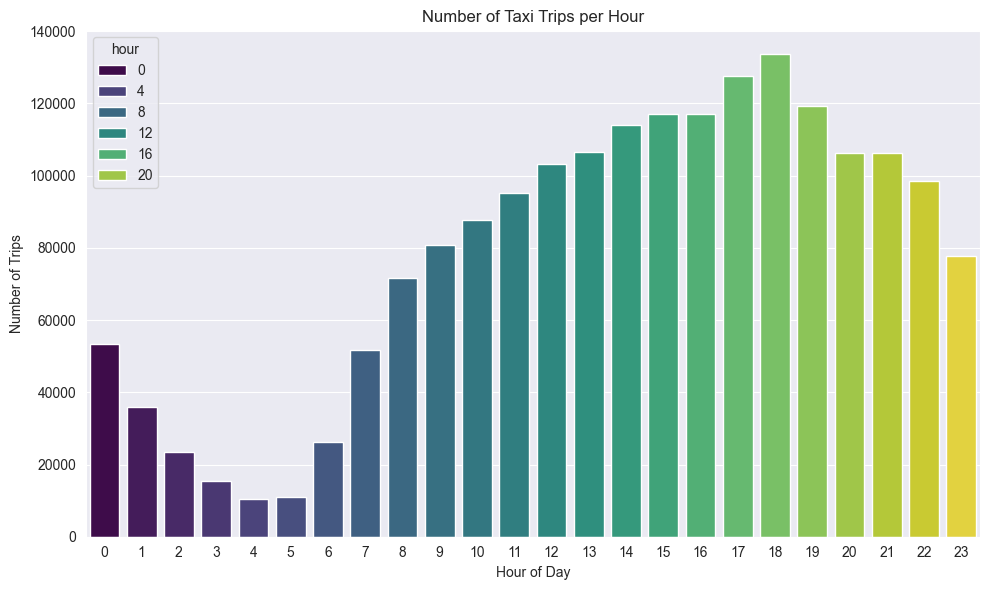

Busiest hour: 18:00 with 133559 trips


In [164]:
# Visualise the number of trips per hour and find the busiest hour
hourly_trip_counts = cleaned_and_sampled_by_month_date_hour_df.copy()
hourly_trip_value_counts = hourly_trip_counts['hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_trip_value_counts.index, y=hourly_trip_value_counts.charge_tip__sort_values, palette='viridis', hue=hourly_trip_value_counts.index)
plt.title('Number of Taxi Trips per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

busiest_hour = hourly_trip_value_counts.idxmax()
trip_count = hourly_trip_value_counts.max()

print(f"Busiest hour: {busiest_hour}:00 with {trip_count} trips")

del hourly_trip_counts
del hourly_trip_value_counts

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [354]:
# Scale up the number of trips
scale_factor = 20 # (scale_factor = 100/5 =20 ##### since 5% is only sampling data
five_busiest_hour = cleaned_and_sampled_by_month_date_hour_df.copy()

hourly_trip_counts = five_busiest_hour.groupby('hour').size().reset_index(name='trip_count')
top_5_hours = hourly_trip_counts.sort_values(by='trip_count', ascending=False).head(5)
top_5_hours['actual_trip_count (app)'] = top_5_hours['trip_count'] * scale_factor
top_5_hours


hour  trip_count  actual_trip_count (app)
18    18      133559                  2671180
17    17      127475                  2549500
19    19      119342                  2386840
16    16      117053                  2341060
15    15      117026                  2340520

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

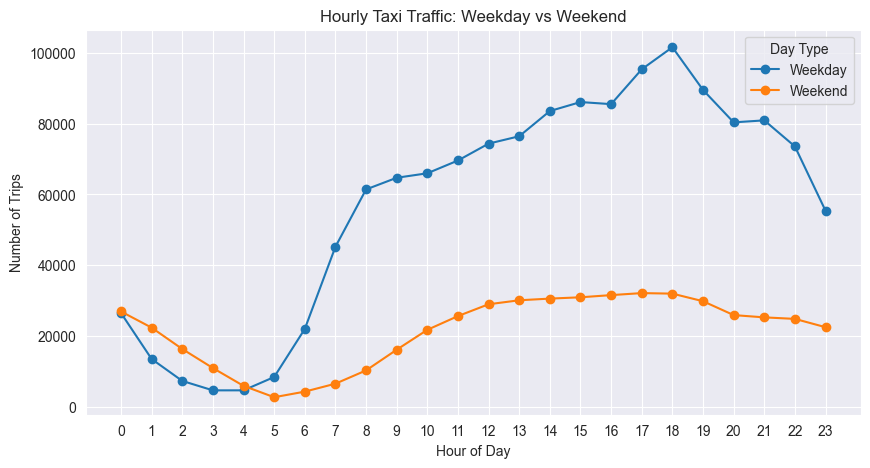

In [223]:
# Compare traffic trends for the week days and weekends
weekday_weekend_hour_compare = cleaned_and_sampled_by_month_date_hour_df.copy()
weekday_weekend_hour_compare['is_weekend'] = weekday_weekend_hour_compare['day_of_the_week'].isin(['Saturday', 'Sunday'])
weekday_weekend_hour_compare_pattern = weekday_weekend_hour_compare.groupby(['hour', 'is_weekend']).size().reset_index(name='trip_count')

pivot = weekday_weekend_hour_compare_pattern.pivot(index='hour', columns='is_weekend', values='trip_count')
pivot.columns = ['Weekday', 'Weekend']

pivot.plot(kind='line', figsize=(10, 5), marker='o')
plt.title("Hourly Taxi Traffic: Weekday vs Weekend")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Day Type')
plt.show()

del weekday_weekend_hour_compare
del weekday_weekend_hour_compare_pattern


** What can you infer from the above patterns? How will finding busy and quiet hours for each day help us? **
- These insights can inform resource allocation and driver deployment strategies based on expected demand patterns

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

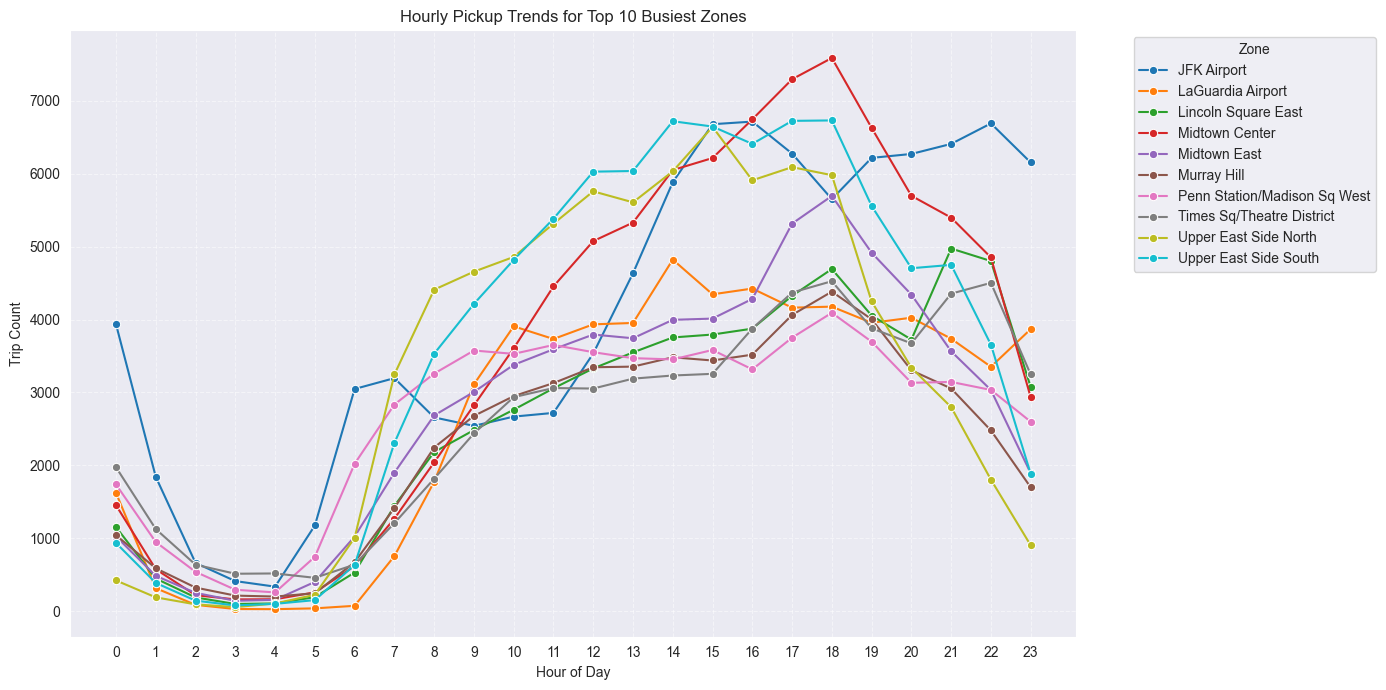

In [233]:
hotspots_df = cleaned_and_sampled_by_month_date_hour_df.copy()

# Find top 10 pickup zones
pu_hotspots_df = hotspots_df.groupby(['hour', 'PULocationID']).size().reset_index(name='trip_count')

total_pickups_per_zone = pu_hotspots_df.groupby('PULocationID')['trip_count'].sum().reset_index()
top_10_zones = total_pickups_per_zone.sort_values(by='trip_count', ascending=False).head(10)
top_zone_ids = top_10_zones['PULocationID'].tolist()
top_zones_hourly = pu_hotspots_df[pu_hotspots_df['PULocationID'].isin(top_zone_ids)]
top_zones_hourly = top_zones_hourly.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')

plt.figure(figsize=(14, 7))
sns.lineplot(data=top_zones_hourly, x='hour', y='trip_count', hue='zone', marker='o')

plt.title("Hourly Pickup Trends for Top 10 Busiest Zones")
plt.xlabel("Hour of Day")
plt.ylabel("Trip Count")
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Zone', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

del hotspots_df
del pu_hotspots_df
del total_pickups_per_zone
del top_10_zones
del top_zones_hourly
del top_zone_ids


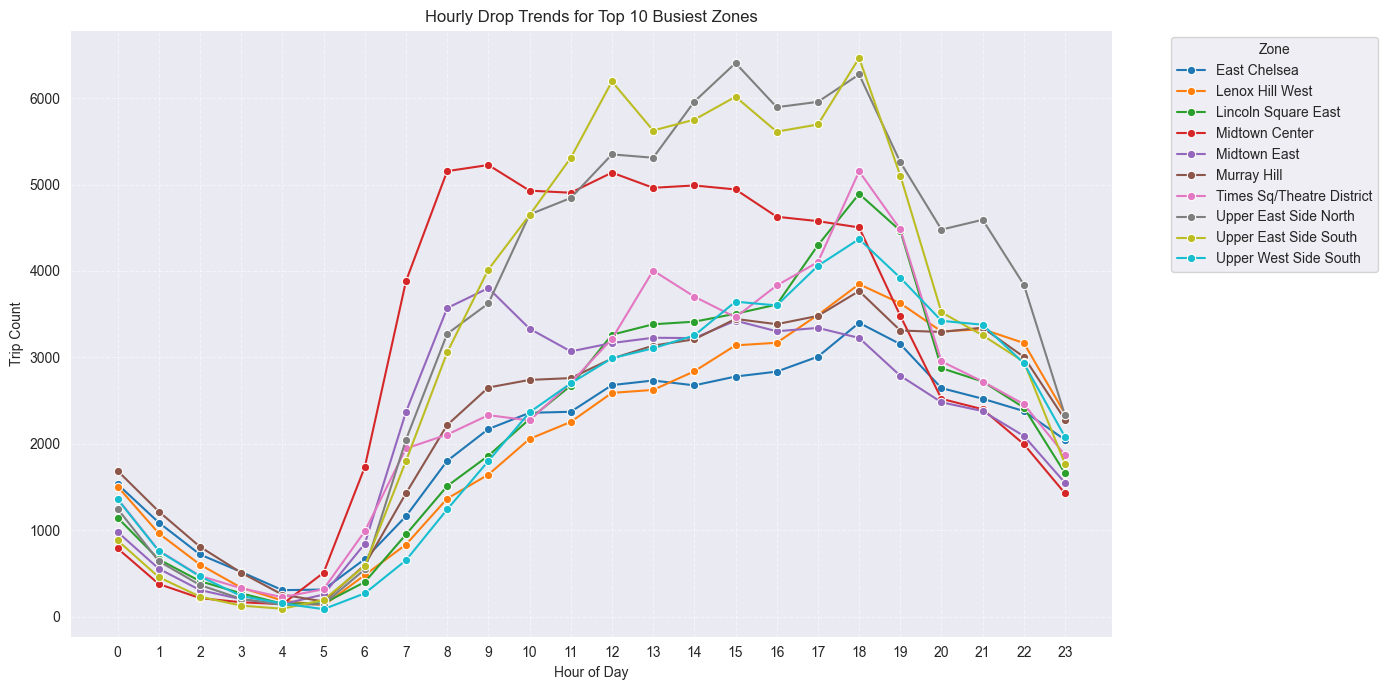

In [355]:
# Find top 10 dropoff zones
do_hotspots_df = cleaned_and_sampled_by_month_date_hour_df.copy()
do_hotspots_df['do_hour'] = do_hotspots_df['tpep_dropoff_datetime'].dt.hour

do_hotspots_grouped_df = do_hotspots_df.groupby(['do_hour', 'DOLocationID']).size().reset_index(name='trip_count')

total_drops_per_zone = do_hotspots_grouped_df.groupby('DOLocationID')['trip_count'].sum().reset_index()
top_10_zones = total_drops_per_zone.sort_values(by='trip_count', ascending=False).head(10)
top_zone_ids = top_10_zones['DOLocationID'].tolist()
top_zones_hourly = do_hotspots_grouped_df[do_hotspots_grouped_df['DOLocationID'].isin(top_zone_ids)]
top_zones_hourly = top_zones_hourly.merge(zones[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID', how='left')

plt.figure(figsize=(14, 7))
sns.lineplot(data=top_zones_hourly, x='do_hour', y='trip_count', hue='zone', marker='o')

plt.title("Hourly Drop Trends for Top 10 Busiest Zones")
plt.xlabel("Hour of Day")
plt.ylabel("Trip Count")
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Zone', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



del do_hotspots_df
del do_hotspots_grouped_df
del total_drops_per_zone
del top_10_zones
del top_zones_hourly
del top_zone_ids

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [239]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pu_do_ratios_by_location_id_df = cleaned_and_sampled_by_month_date_hour_df.copy()

pickup_counts = pu_do_ratios_by_location_id_df.groupby('PULocationID').size().reset_index(name='pickup_count')
dropoff_counts = pu_do_ratios_by_location_id_df.groupby('DOLocationID').size().reset_index(name='dropoff_count')

zone_ratios = pd.merge(pickup_counts, dropoff_counts,
                       left_on='PULocationID', right_on='DOLocationID',
                       how='outer')

zone_ratios['LocationID'] = zone_ratios['PULocationID'].combine_first(zone_ratios['DOLocationID'])

zone_ratios['pickup_dropoff_ratio'] = zone_ratios['pickup_count'] / zone_ratios['dropoff_count']
zone_ratios = zone_ratios.merge(zones[['LocationID', 'zone']], left_on='LocationID', right_on='LocationID', how='left')
top10 = zone_ratios.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
bottom10 = zone_ratios.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)

print(top10[['zone', 'pickup_dropoff_ratio']])
print(bottom10[['zone', 'pickup_dropoff_ratio']])
del pu_do_ratios_by_location_id_df
del zone_ratios
del top10
del bottom10

                             zone  pickup_dropoff_ratio
70                  East Elmhurst              8.210166
128                   JFK Airport              4.372072
134             LaGuardia Airport              2.635315
182  Penn Station/Madison Sq West              1.558477
110       Greenwich Village South              1.377347
42                   Central Park              1.369026
245                  West Village              1.332877
158                  Midtown East              1.242697
157                Midtown Center              1.188330
100              Garment District              1.187529
                                    zone  pickup_dropoff_ratio
0                         Newark Airport              0.013390
241                        West Brighton              0.032258
106                          Great Kills              0.038462
111                  Grymes Hill/Clifton              0.040000
26   Breezy Point/Fort Tilden/Riis Beach              0.051282
253   

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [244]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_trends_df = cleaned_and_sampled_by_month_date_hour_df.copy()
night_trends_df= night_trends_df[(night_trends_df['hour'] >= 23) | (night_trends_df['hour'] <= 5)]

night_trends_pick = night_trends_df.groupby('PULocationID').size().reset_index(name='pickup_count')
night_trends_pick = night_trends_pick.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')
print(night_trends_pick.sort_values(by='pickup_count', ascending=False).head(10))

night_trends_drop = night_trends_df.groupby('DOLocationID').size().reset_index(name='dropoff_count')
night_trends_drop = night_trends_drop.merge(zones[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID', how='left')
print(night_trends_drop.sort_values(by='dropoff_count', ascending=False).head(10))

del night_trends_df
del night_trends_drop
del night_trends_pick

     PULocationID  pickup_count  LocationID                          zone
71             79         16437        79.0                  East Village
115           132         14511       132.0                   JFK Airport
223           249         13119       249.0                  West Village
42             48         10804        48.0                  Clinton East
131           148         10167       148.0               Lower East Side
99            114          9174       114.0       Greenwich Village South
205           230          8464       230.0     Times Sq/Theatre District
165           186          7112       186.0  Penn Station/Madison Sq West
146           164          6439       164.0                 Midtown South
60             68          6368        68.0                  East Chelsea
     DOLocationID  dropoff_count  LocationID                       zone
78             79           8685        79.0               East Village
46             48           7190        48

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [250]:
# Filter for night hours (11 PM to 5 AM)
revenue_share_df = cleaned_and_sampled_by_month_date_hour_df.copy()

night_revenue_df = revenue_share_df[(revenue_share_df['hour'] >= 23) | (revenue_share_df['hour'] <= 5)]
night_revenue = night_revenue_df['total_amount'].sum()

day_revenue_df = revenue_share_df[(revenue_share_df['hour'] < 23) | (revenue_share_df['hour'] > 5)]
day_revenue = day_revenue_df['total_amount'].sum()

print(f" Day's revenue share: {(day_revenue / (day_revenue + night_revenue))*100} %")
print(f" Night's revenue share: {(night_revenue / (day_revenue + night_revenue))*100} %")

del revenue_share_df
del day_revenue_df
del day_revenue
del night_revenue_df
del night_revenue

 Day's revenue share: 89.08305565995119 %
 Night's revenue share: 10.91694434004882 %


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [262]:
# Analyse the fare per mile per passenger for different passenger counts
avg_price_passenger_df = cleaned_and_sampled_by_month_date_hour_df.copy()

avg_price_passenger_df= avg_price_passenger_df[~(avg_price_passenger_df['trip_distance'] == 0)]
avg_price_passenger_df['fare_per_mile_per_passenger'] = avg_price_passenger_df['fare_amount'] / (avg_price_passenger_df['trip_distance'] * avg_price_passenger_df['passenger_count'])

avg_price_passenger_df.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

del avg_price_passenger_df

passenger_count  fare_per_mile_per_passenger
0              1.0                    10.862568
1              2.0                     6.431558
2              3.0                     3.907755
3              4.0                     4.347749
4              5.0                     1.709614
5              6.0                     1.350658

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

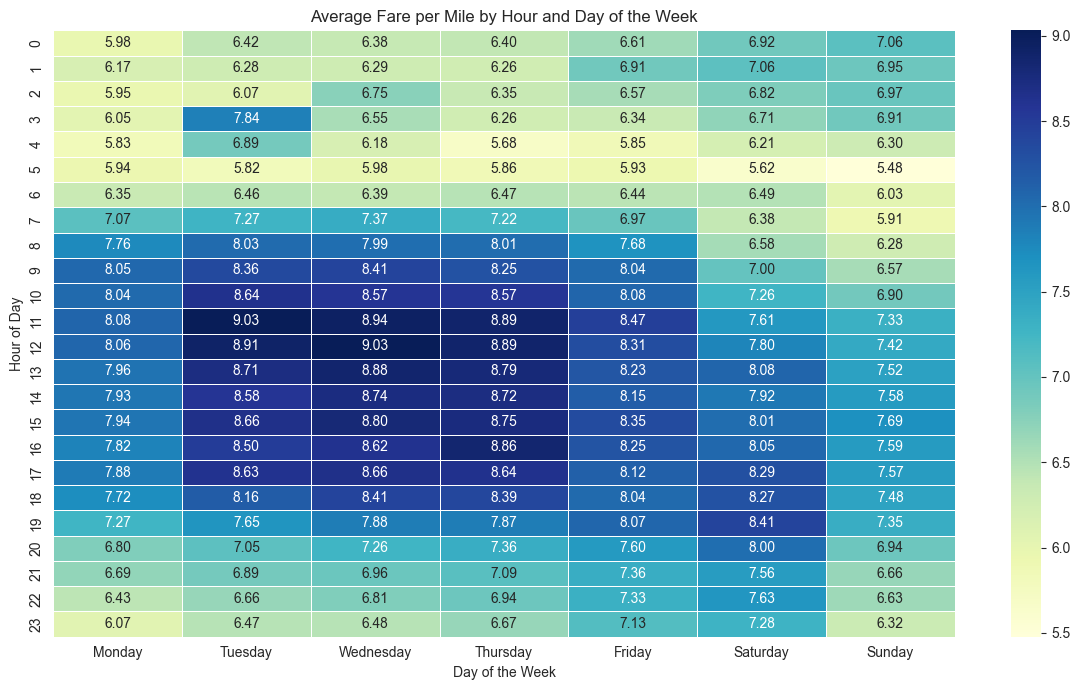

In [6]:
# Compare the average fare per mile for different days and for different times of the day
avg_price_per_hour_df = cleaned_and_sampled_by_month_date_hour_df.copy()

avg_price_per_hour_df = avg_price_per_hour_df[avg_price_per_hour_df['trip_distance'] > 0]
avg_price_per_hour_df = avg_price_per_hour_df[
    ~(
    (avg_price_per_hour_df['trip_distance'] < 1.0) &
    (avg_price_per_hour_df['fare_amount'] >= 10)
    )
]
avg_price_per_hour_df['fare_per_mile'] = avg_price_per_hour_df['fare_amount'] / (avg_price_per_hour_df['trip_distance'])

heatmap_df= avg_price_per_hour_df.groupby(['hour','day_of_the_week'])['fare_per_mile'].mean().reset_index()
heatmap_pivot = heatmap_df.pivot(index='hour', columns='day_of_the_week', values='fare_per_mile')

# Optional: Sort days of week in logical order if not already
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_pivot = heatmap_pivot[day_order]

# Plot heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_pivot, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("Average Fare per Mile by Hour and Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of Day")
plt.tight_layout()
plt.show()
del avg_price_per_hour_df


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

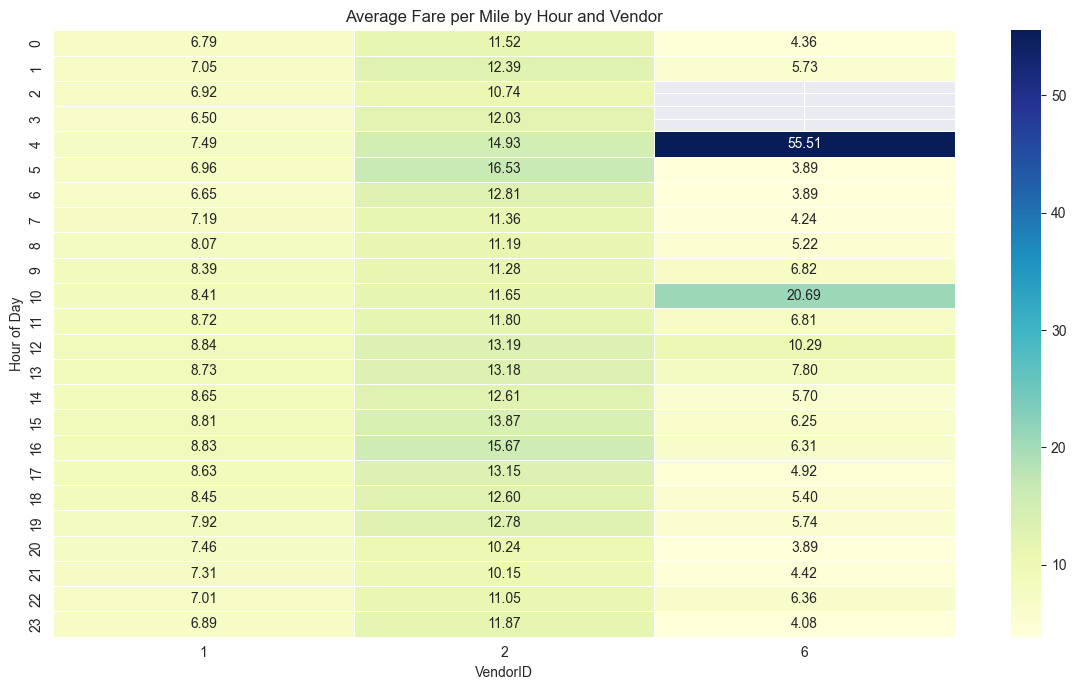

In [12]:
# Compare fare per mile for different vendors
avg_price_per_vendor_df = cleaned_and_sampled_by_month_date_hour_df.copy()

avg_price_per_vendor_df= avg_price_per_vendor_df[avg_price_per_vendor_df['trip_distance'] > 0]
avg_price_per_vendor_df['fare_per_mile'] = avg_price_per_vendor_df['fare_amount'] / (avg_price_per_vendor_df['trip_distance'])


heatmap_df= avg_price_per_vendor_df.groupby(['hour','VendorID'])['fare_per_mile'].mean().reset_index()
heatmap_pivot = heatmap_df.pivot(index='hour', columns='VendorID', values='fare_per_mile')

vendor_order = [1, 2, 6]
heatmap_pivot = heatmap_pivot[vendor_order]

# Plot heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_pivot, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("Average Fare per Mile by Hour and Vendor")
plt.xlabel("VendorID")
plt.ylabel("Hour of Day")
plt.tight_layout()
plt.show()

del avg_price_per_vendor_df


In [11]:
cleaned_and_sampled_by_month_date_hour_df['VendorID'].unique()

array([2, 1, 6])

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


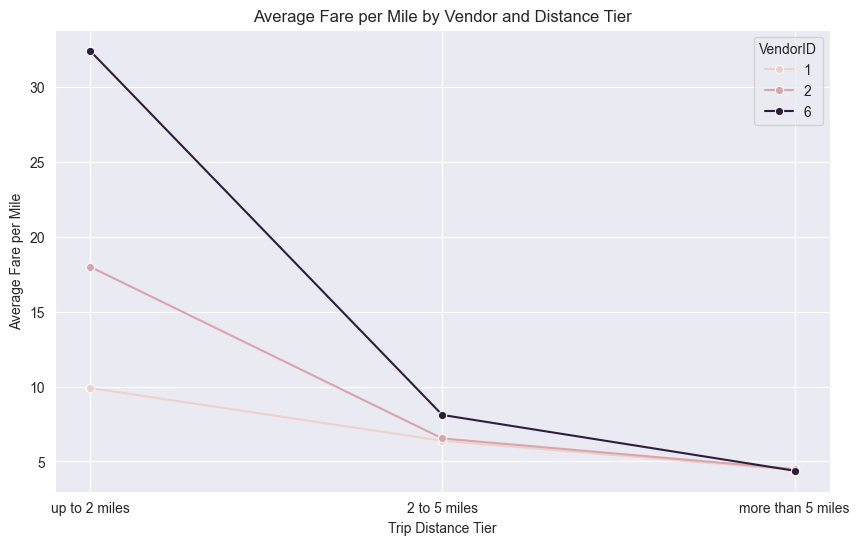

In [269]:
# Defining distance tiers
distance_tier_df = cleaned_and_sampled_by_month_date_hour_df.copy()
distance_tier_df = distance_tier_df[distance_tier_df['trip_distance'] > 0]

def distance_tier(distance):
    if distance <= 2:
        return 'up to 2 miles'
    elif distance <= 5:
        return '2 to 5 miles'
    else:
        return 'more than 5 miles'

distance_tier_df['distance_tier'] = distance_tier_df['trip_distance'].apply(distance_tier)
distance_tier_df['fare_per_mile'] = distance_tier_df['fare_amount'] / distance_tier_df['trip_distance']
avg_fare_by_vendor_tier = (
    distance_tier_df.groupby(['VendorID', 'distance_tier'])['fare_per_mile']
    .mean()
    .reset_index()
)

distance_order = ['up to 2 miles', '2 to 5 miles', 'more than 5 miles']
avg_fare_by_vendor_tier['distance_tier'] = pd.Categorical(
    avg_fare_by_vendor_tier['distance_tier'],
    categories=distance_order,
    ordered=True
)

plt.figure(figsize=(10,6))
sns.lineplot(
    data=avg_fare_by_vendor_tier,
    x='distance_tier',
    y='fare_per_mile',
    hue='VendorID',
    marker='o'
)

plt.title('Average Fare by Vendor and Distance tier')
plt.xlabel('Trip Distance tier')
plt.ylabel('Average Fare per mile')
plt.grid(True)
plt.show()

del avg_fare_by_vendor_tier
del distance_tier_df



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

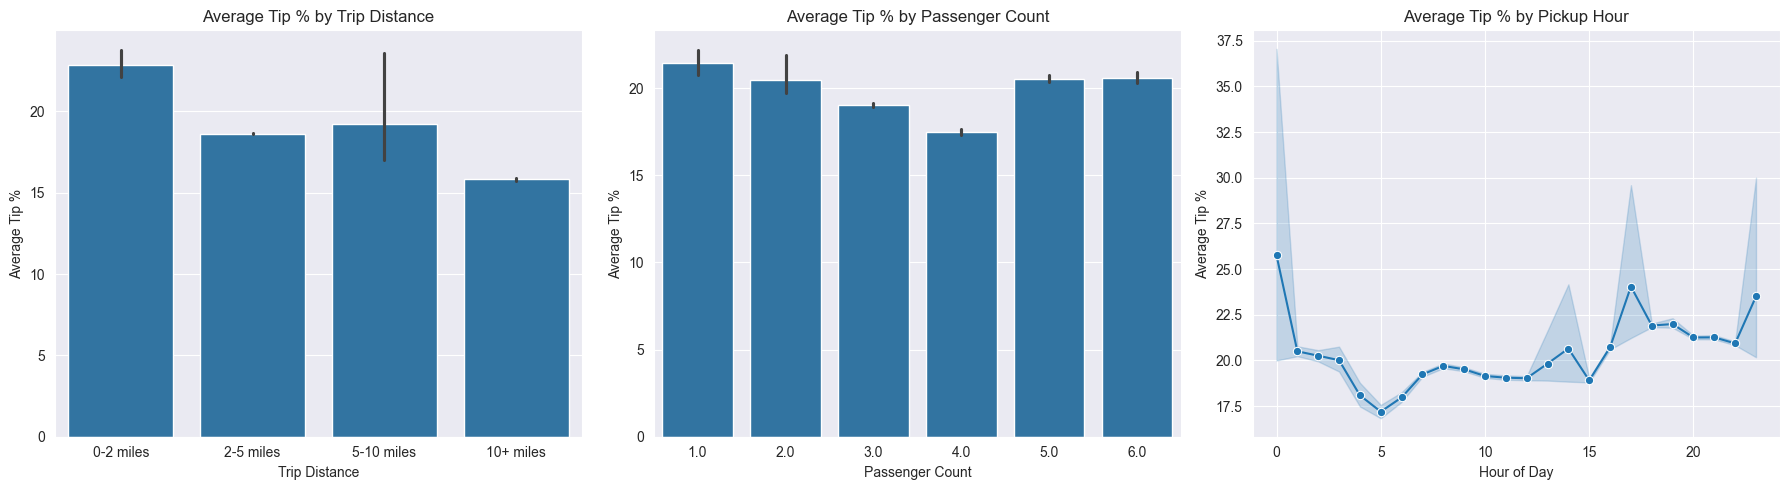

In [270]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
avg_tip_df = cleaned_and_sampled_by_month_date_hour_df.copy()
avg_tip_df = avg_tip_df[avg_tip_df['fare_amount'] > 0]

avg_tip_df['tip_percentage'] = (avg_tip_df['tip_amount'] / avg_tip_df['fare_amount'])*100

distance_bins = [0, 2, 5, 10, 100]
distance_labels = ['0-2 miles', '2-5 miles', '5-10 miles', '10+ miles']
avg_tip_df['trip_distance_bin'] = pd.cut(avg_tip_df['trip_distance'], bins=distance_bins, labels=distance_labels, include_lowest=True)

fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.barplot(x='trip_distance_bin', y='tip_percentage', data=avg_tip_df, ax=axes[0])
axes[0].set_title('Average Tip % by Trip Distance')
axes[0].set_xlabel('Trip Distance')
axes[0].set_ylabel('Average Tip %')

sns.barplot(x='passenger_count', y='tip_percentage', data=avg_tip_df, ax=axes[1])
axes[1].set_title('Average Tip % by Passenger Count')
axes[1].set_xlabel('Passenger Count')
axes[1].set_ylabel('Average Tip %')

sns.lineplot(x='hour', y='tip_percentage', data=avg_tip_df, marker='o', ax=axes[2])
axes[2].set_title('Average Tip % by Pickup Hour')
axes[2].set_xlabel('Hour of Day')
axes[2].set_ylabel('Average Tip %')

plt.tight_layout()
plt.show()

del avg_tip_df

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

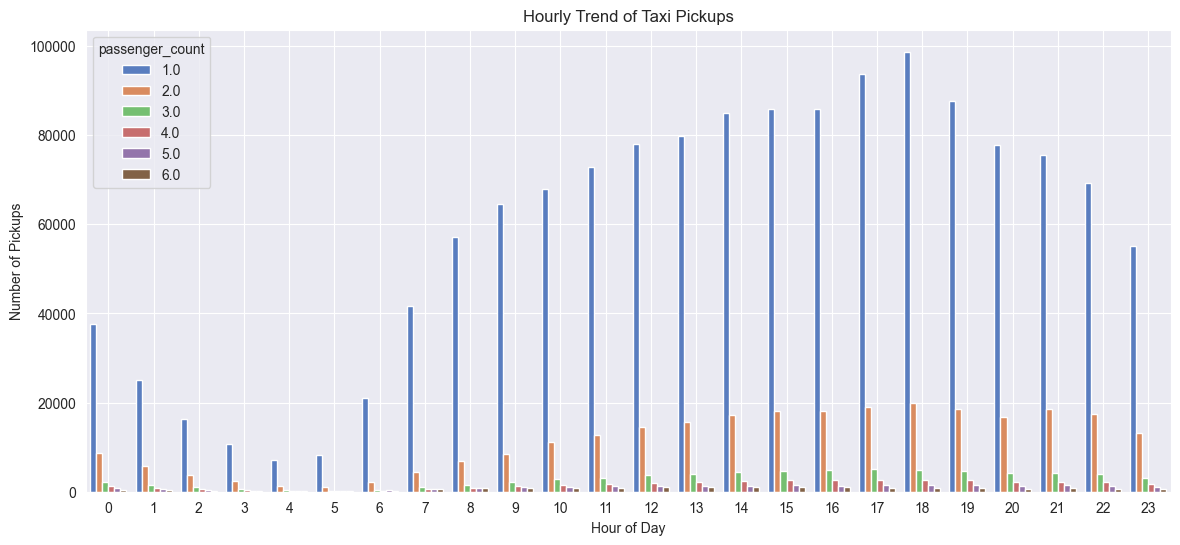

In [273]:
# See how passenger count varies across hours and days
passenger_count_analysis_df = cleaned_and_sampled_by_month_date_hour_df.copy()

passenger_count_hourly_df = (
    passenger_count_analysis_df.groupby(['hour', 'passenger_count'])
      .size()
      .reset_index(name='trip_count')
)

plt.figure(figsize=(14, 6))
sns.barplot(x='hour', y='trip_count', hue='passenger_count', data=passenger_count_hourly_df, palette='muted')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.title('Hourly Trend of Taxi Pickups')
plt.grid(True)
plt.show()

del passenger_count_analysis_df

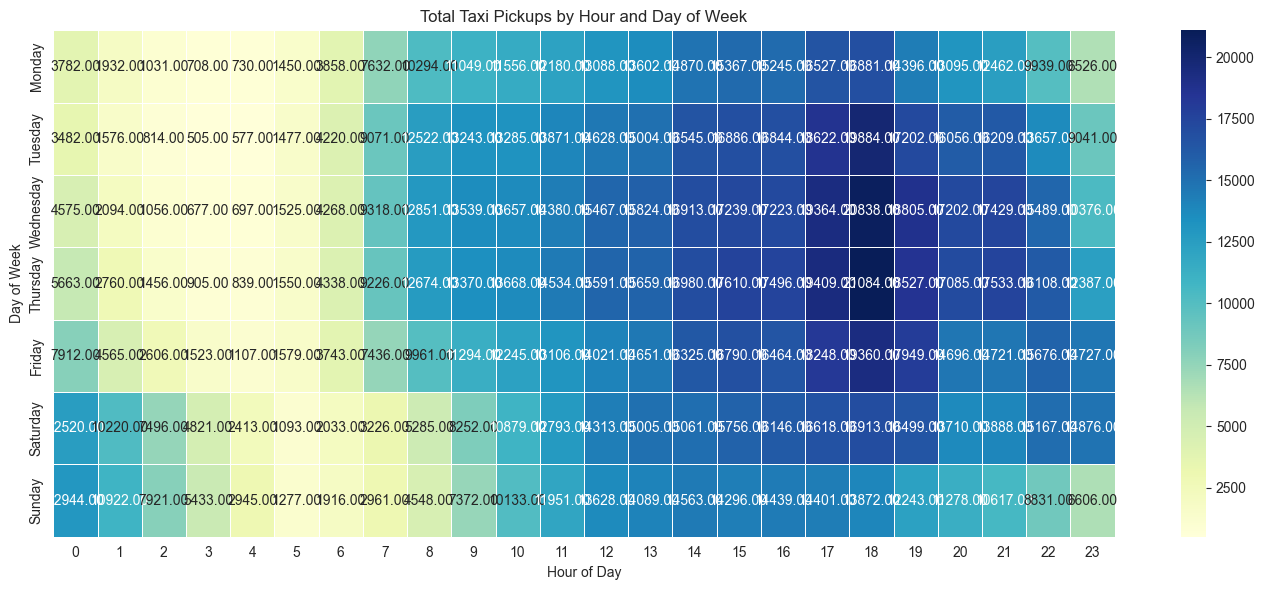

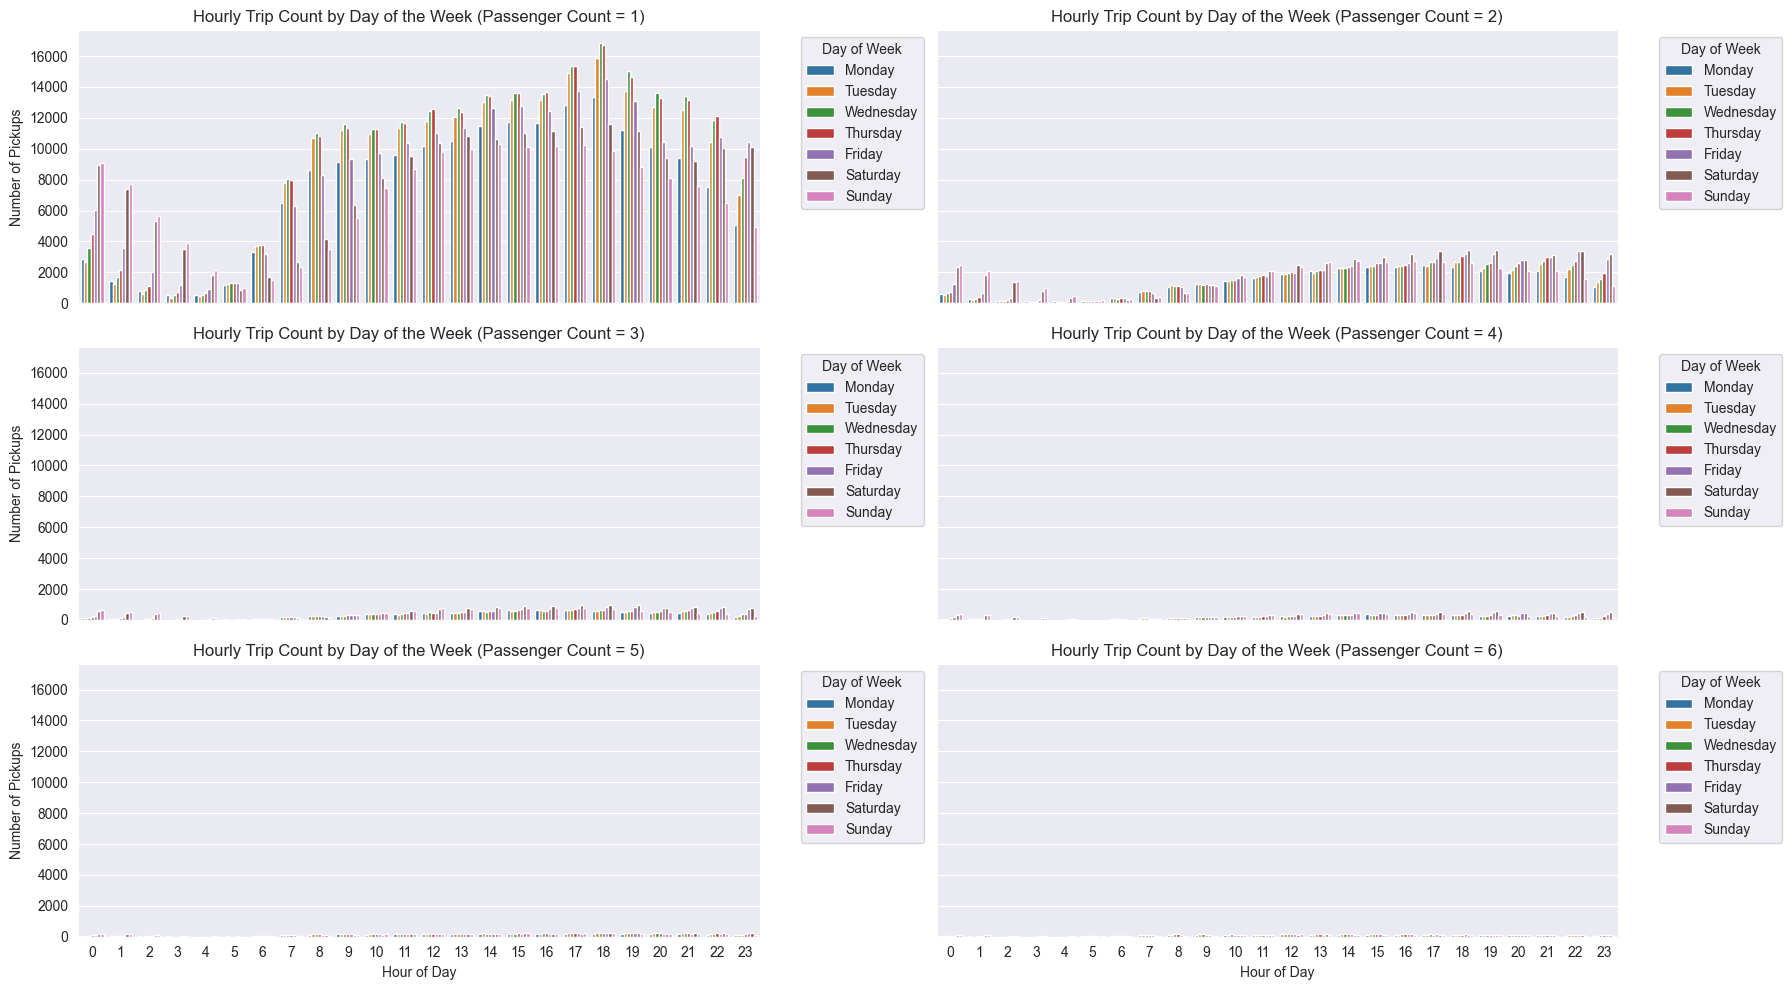

In [13]:
passenger_count_analysis_df = cleaned_and_sampled_by_month_date_hour_df.copy()


passenger_count_hourly_week_df = (
    passenger_count_analysis_df.groupby(['day_of_the_week','hour', 'passenger_count'])
      .size()
      .reset_index(name='trip_count')
)

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
passenger_count_hourly_week_df['day_of_the_week'] = pd.Categorical(passenger_count_hourly_week_df['day_of_the_week'], categories=days_order, ordered=True)

plt.figure(figsize=(14, 6))
pivot = passenger_count_hourly_week_df.pivot_table(index='day_of_the_week', columns='hour', values='trip_count', aggfunc='sum', observed=False)
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=0.5)
plt.title('Total Taxi Pickups by Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

passenger_counts = sorted(passenger_count_analysis_df['passenger_count'].dropna().unique())
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, pc in enumerate(passenger_counts):
    ax = axes[i]
    subset = passenger_count_hourly_week_df[passenger_count_hourly_week_df['passenger_count'] == pc]
    sns.barplot(
        data=subset,
        x='hour',
        y='trip_count',
        hue='day_of_the_week',
        ax=ax
    )
    ax.set_title(f'Hourly Trip Count by Day of the Week (Passenger Count = {i+1})')
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Number of Pickups')
    ax.legend(title='Day of Week', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

del passenger_count_analysis_df

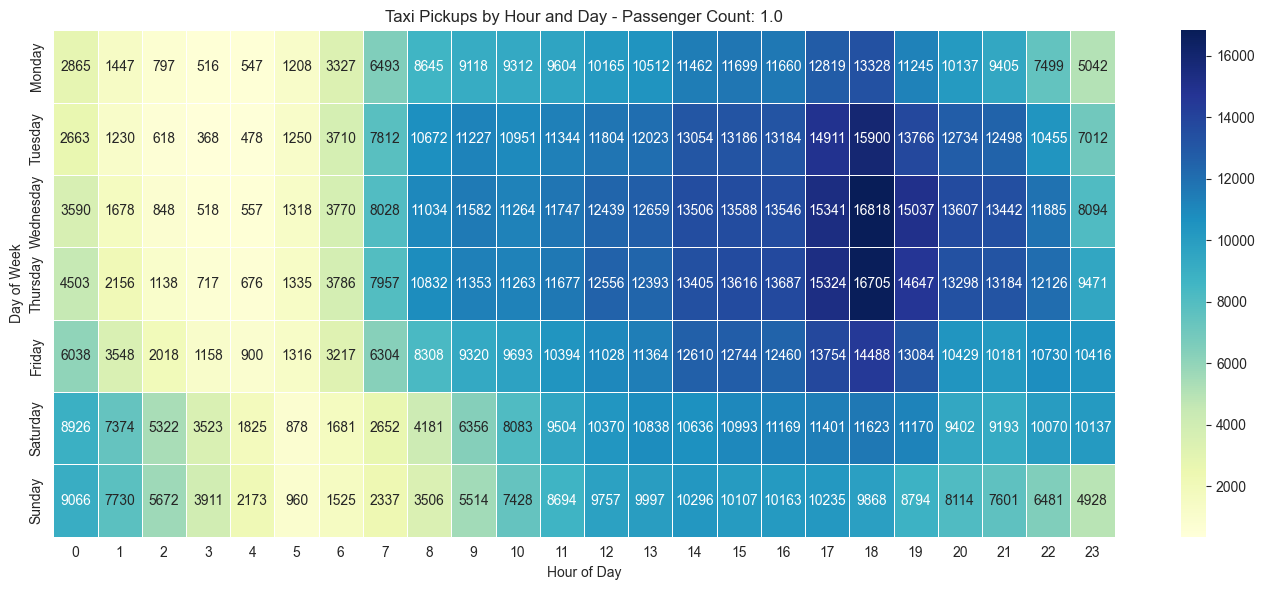

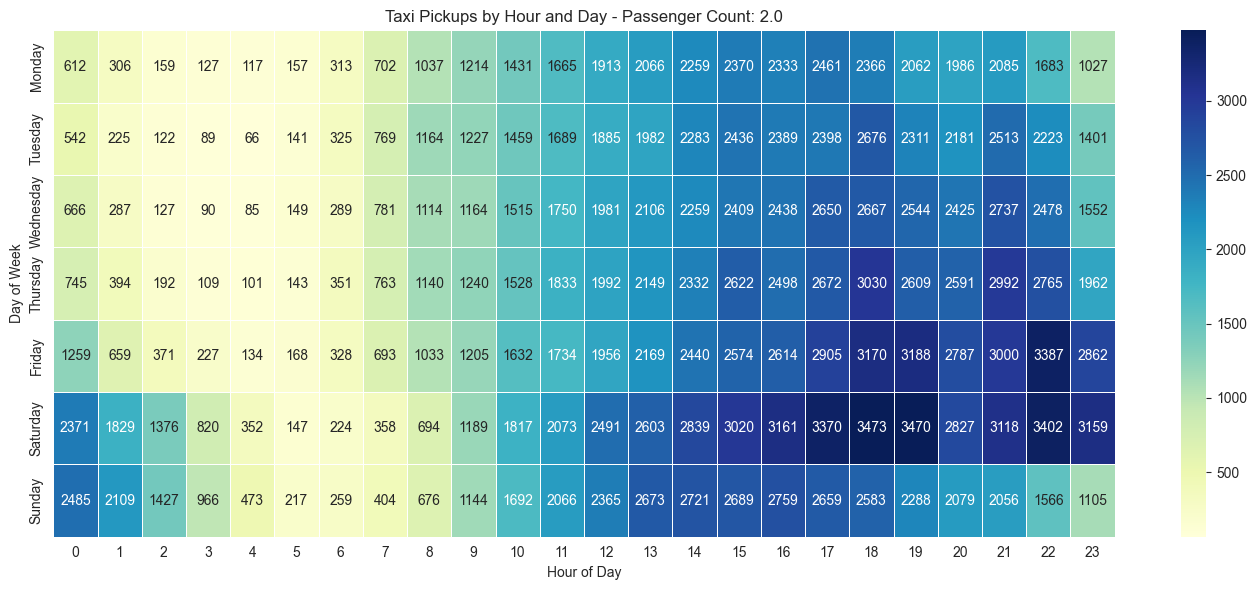

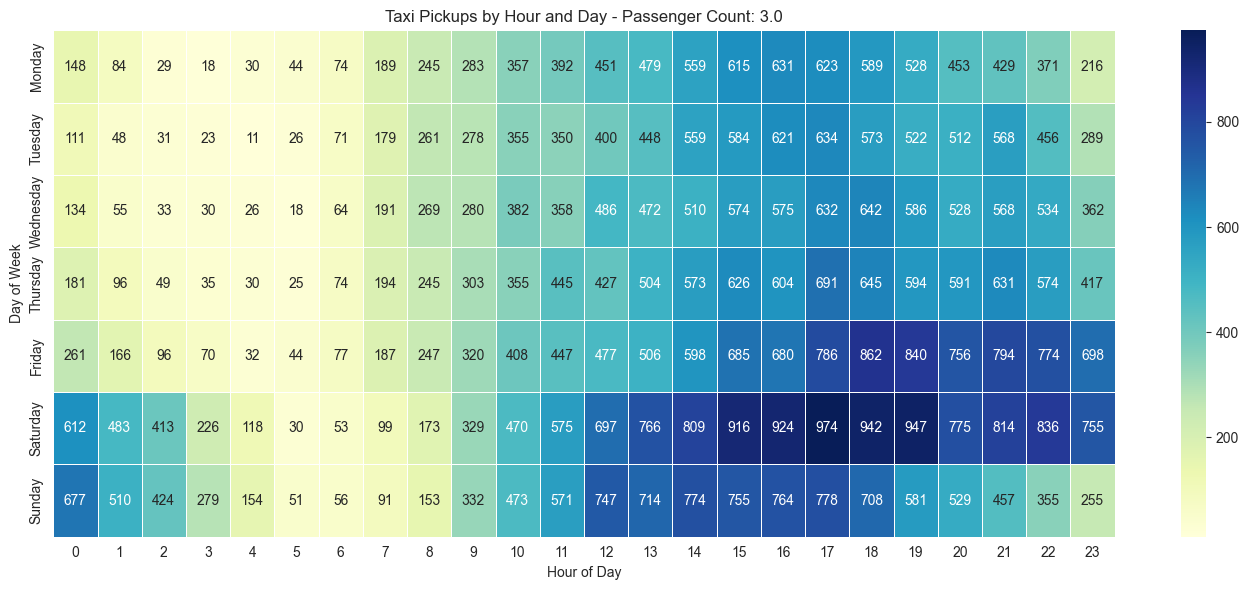

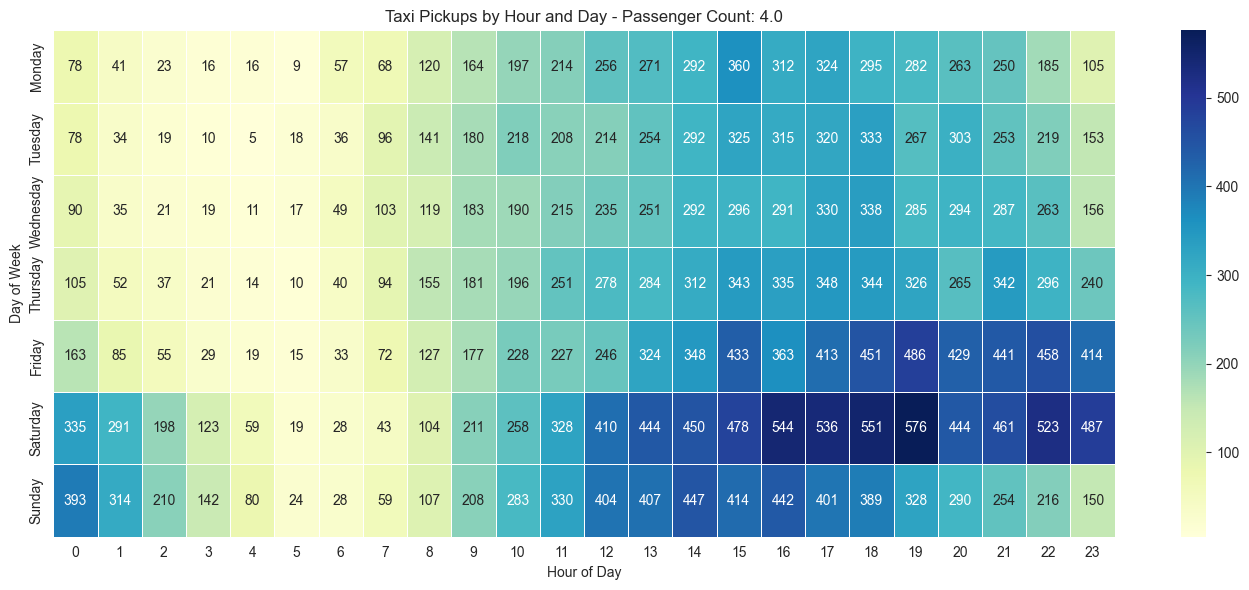

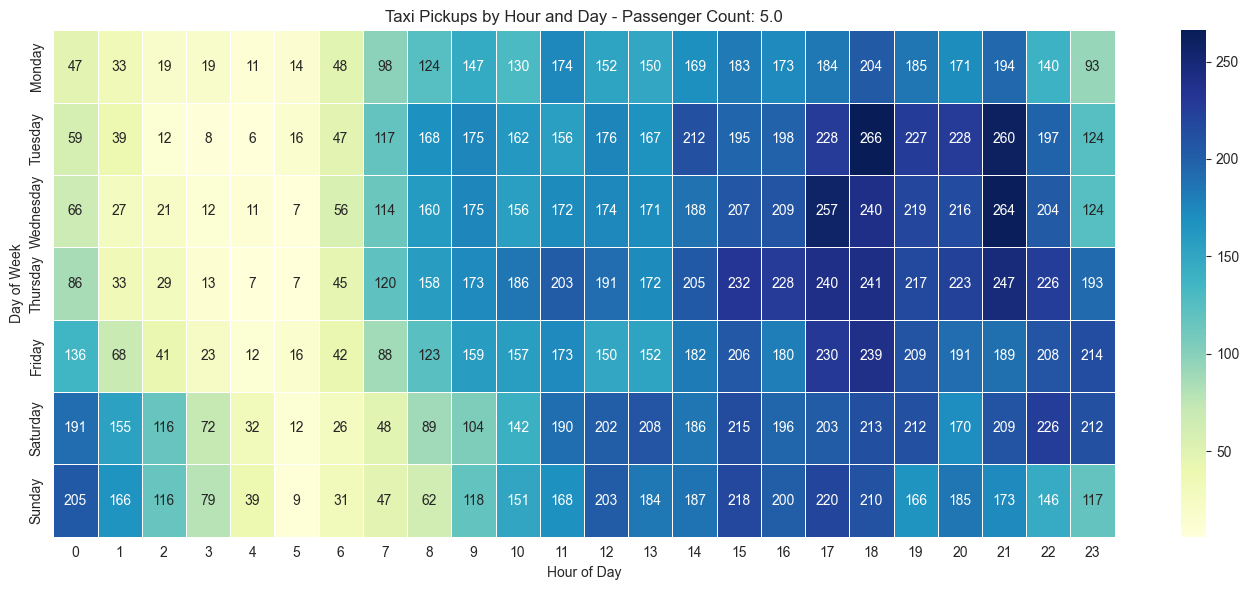

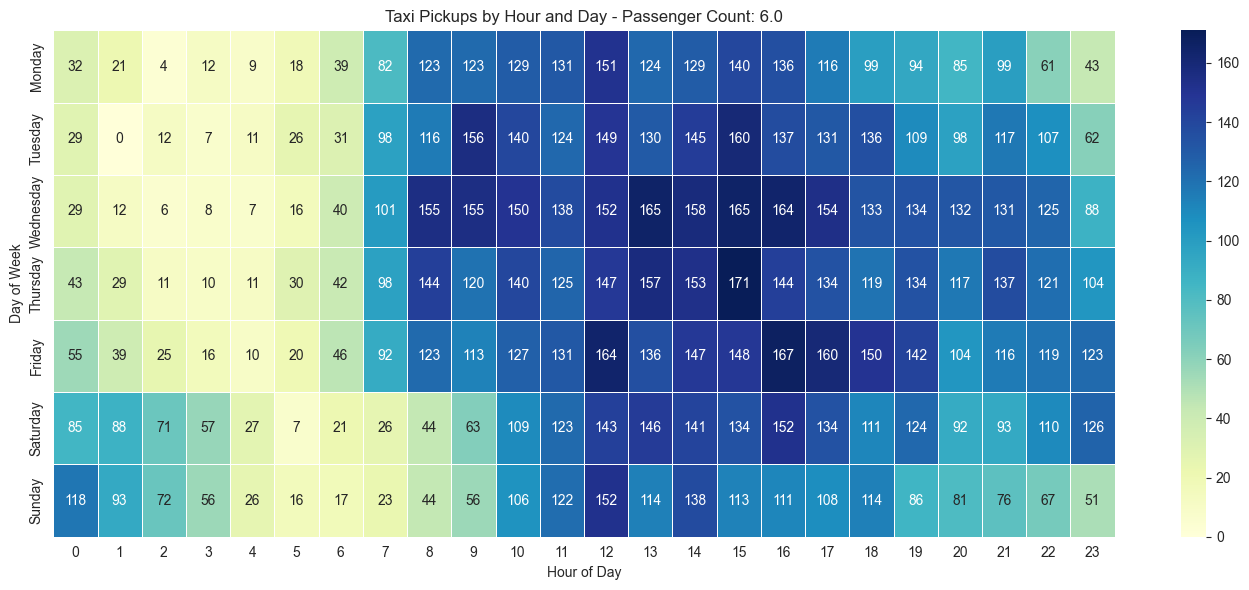

In [15]:
unique_passenger_counts = passenger_count_hourly_week_df['passenger_count'].unique()

for pc in sorted(unique_passenger_counts):
    subset = passenger_count_hourly_week_df[passenger_count_hourly_week_df['passenger_count'] == pc]

    pivot = subset.pivot_table(index='day_of_the_week', columns='hour', values='trip_count', aggfunc='sum', observed=False)

    plt.figure(figsize=(14, 6))
    sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu', linewidths=0.5)
    plt.title(f'Taxi Pickups by Hour and Day - Passenger Count: {pc}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Day of Week')
    plt.tight_layout()
    plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

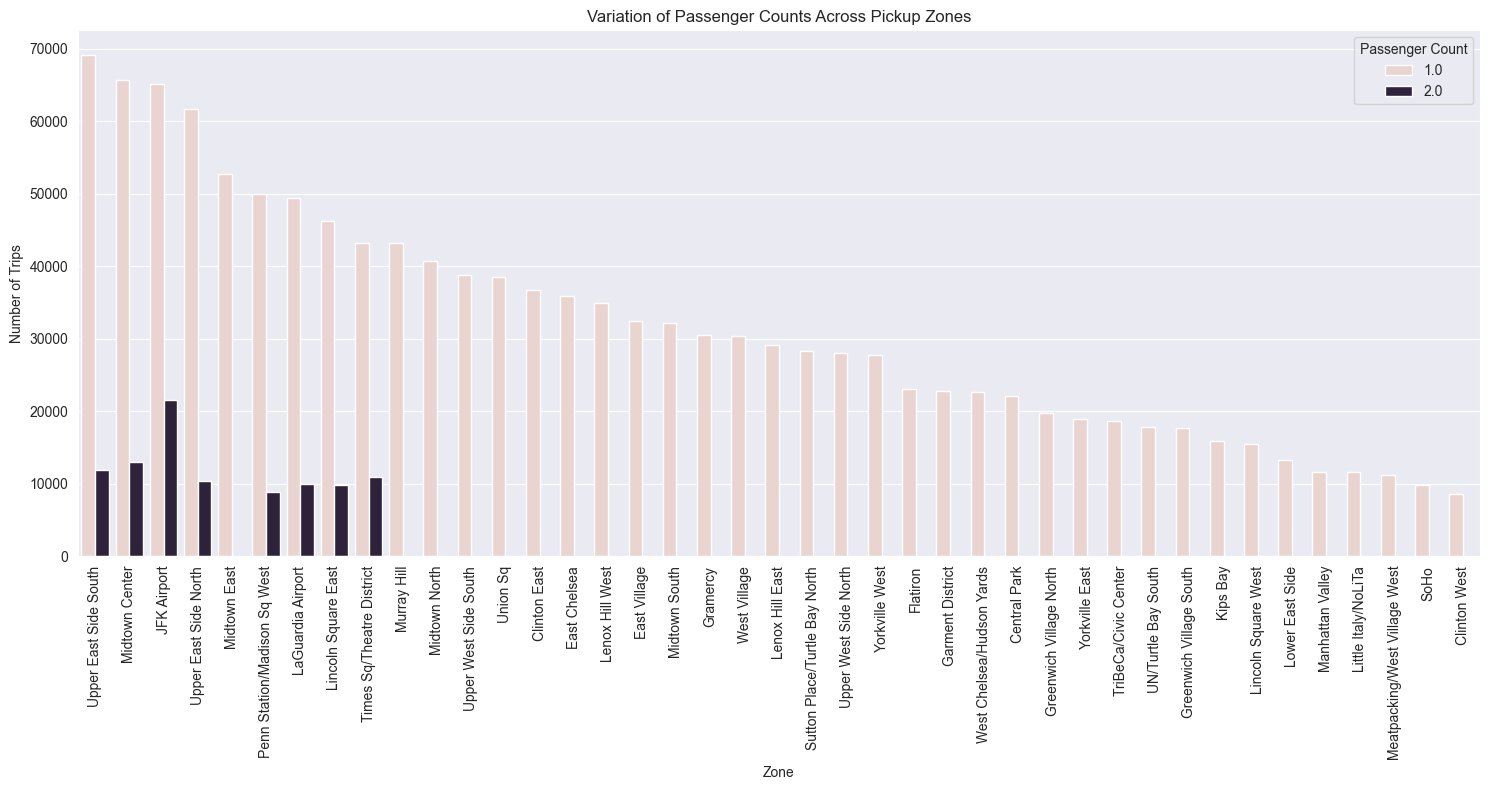

In [305]:
# How does passenger count vary across zones
passenger_across_zones_df = cleaned_and_sampled_by_month_date_hour_df.copy()

zone_passenger_counts = passenger_across_zones_df.groupby(['PULocationID', 'passenger_count']).size().reset_index(name='trip_count').sort_values(by=['trip_count','passenger_count'], ascending=False).head(50)
zone_passenger_counts = zone_passenger_counts.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')

plt.figure(figsize=(15, 8))
sns.barplot(data=zone_passenger_counts, x='zone', y='trip_count', hue='passenger_count')
plt.xticks(rotation=90)
plt.xlabel('Zone')
plt.ylabel('Number of Trips')
plt.title('Variation of Passenger Counts Across Pickup Zones')
plt.legend(title='Passenger Count')
plt.tight_layout()
plt.show()


del passenger_across_zones_df

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [27]:
# How often is each surcharge applied?
extra_amount_analysis_df = cleaned_and_sampled_by_month_date_hour_df.copy()

extra_amount_analysis_filtered_df = extra_amount_analysis_df[extra_amount_analysis_df['extra'] > 0]
extra_pickup_counts = extra_amount_analysis_filtered_df.groupby('PULocationID').size().reset_index(name='extra_charge_tip')
total_pickup_counts = extra_amount_analysis_df.groupby('PULocationID').size().reset_index(name='total_tip_counts')

extra_pickup_freq = extra_pickup_counts.merge(total_pickup_counts, on='PULocationID')
extra_pickup_freq['extra_charge_frequency'] = (
    extra_pickup_freq['extra_charge_tip'] / extra_pickup_freq['total_tip_counts']
)

extra_pickup_freq = extra_pickup_freq.merge(zones[['LocationID', 'zone']], left_on='PULocationID', right_on='LocationID', how='left')
extra_pickup_freq = extra_pickup_freq.sort_values(by='extra_charge_frequency', ascending=False)

display(extra_pickup_freq[extra_pickup_freq['extra_charge_frequency'] != 1][['zone','extra_charge_frequency','extra_charge_tip','total_tip_counts']].head(20))

del extra_amount_analysis_filtered_df
del extra_pickup_counts
del extra_pickup_freq
del total_pickup_counts
del extra_amount_analysis_df


zone  extra_charge_frequency  extra_charge_tip  \
115              LaGuardia Airport                0.987247             63401   
60                   East Elmhurst                0.832480              6992   
124                Lower East Side                0.784731             15398   
93         Greenwich Village South                0.766493             19229   
69                    East Village                0.733644             33193   
218                   West Village                0.730590             30611   
120            Little Italy/NoLiTa                0.697588             11972   
134  Meatpacking/West Village West                0.676611             11227   
183                           SoHo                0.672843              9514   
221                  Willets Point                0.666667                 2   
37                    Clinton East                0.658137             33022   
200      Times Sq/Theatre District                0.654506             40885   
204                       Union Sq                0.644395             32694   
1                    Alphabet City                0.644169              1508   
140                  Midtown South                0.641832             28231   
215      West Chelsea/Hudson Yards                0.638368             20295   
201           TriBeCa/Civic Center                0.636317             16242   
137                 Midtown Center                0.634377             55475   
102                      Hudson Sq                0.628498              5862   
92         Greenwich Village North                0.626565             16369   

     total_tip_counts  
115             64220  
60               8399  
124             19622  
93              25087  
69              45244  
218             41899  
120             17162  
134             16593  
183             14140  
221                 3  
37              50175  
200             62467  
204             50736  
1                2341  
140             43985  
215             31792  
201             25525  
137             87448  
102              9327  
92              26125

In [26]:
extra_amount_analysis_df = cleaned_and_sampled_by_month_date_hour_df.copy()

extra_amount_analysis_filtered_df = extra_amount_analysis_df[extra_amount_analysis_df['extra'] > 0]
extra_pickup_counts = extra_amount_analysis_filtered_df.groupby('DOLocationID').size().reset_index(name='extra_charge_tip')
total_pickup_counts = extra_amount_analysis_df.groupby('DOLocationID').size().reset_index(name='total_tip_counts')

extra_pickup_freq = extra_pickup_counts.merge(total_pickup_counts, on='DOLocationID')
extra_pickup_freq['extra_charge_frequency'] = (
    extra_pickup_freq['extra_charge_tip'] / extra_pickup_freq['total_tip_counts']
)

extra_pickup_freq = extra_pickup_freq.merge(zones[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID', how='left')
extra_pickup_freq = extra_pickup_freq.sort_values(by='extra_charge_frequency', ascending=False)

display(extra_pickup_freq[extra_pickup_freq['extra_charge_frequency'] != 1][['zone','extra_charge_frequency','extra_charge_tip','total_tip_counts']].head(20))

del extra_amount_analysis_filtered_df
del extra_pickup_counts
del extra_pickup_freq
del total_pickup_counts
del extra_amount_analysis_df

zone  extra_charge_frequency  extra_charge_tip  \
134          LaGuardia Airport                0.891789             21732   
169               North Corona                0.794667               298   
39             Carroll Gardens                0.790470              1294   
14     Bay Terrace/Fort Totten                0.783251               159   
51                 Cobble Hill                0.782186               966   
247                 Whitestone                0.778082               284   
80           East Williamsburg                0.775763              1882   
240              West Brighton                0.774194                24   
106                Great Kills                0.769231                20   
218                   Steinway                0.765745              1994   
108                 Greenpoint                0.763802              3182   
177                 Park Slope                0.761914              3805   
252            Windsor Terrace                0.761006               605   
48                Clinton Hill                0.760517              2061   
251  Williamsburg (South Side)                0.757088              3151   
6                      Astoria                0.754092              4100   
250  Williamsburg (North Side)                0.752449              3687   
185           Prospect Heights                0.750581              1291   
53             Columbia Street                0.743781               299   
64                  Douglaston                0.741463               152   

     total_tip_counts  
134             24369  
169               375  
39               1637  
14                203  
51               1235  
247               365  
80               2426  
240                31  
106                26  
218              2604  
108              4166  
177              4994  
252               795  
48               2710  
251              4162  
6                5437  
250              4900  
185              1720  
53                402  
64                205

In [28]:
extra_amount_analysis_df = cleaned_and_sampled_by_month_date_hour_df.copy()

extra_amount_analysis_filtered_df = extra_amount_analysis_df[extra_amount_analysis_df['extra'] > 0]
extra_pickup_counts = extra_amount_analysis_filtered_df.groupby('hour').size().reset_index(name='extra_charge_tip')
total_pickup_counts = extra_amount_analysis_df.groupby('hour').size().reset_index(name='total_tip_counts')

extra_pickup_freq = extra_pickup_counts.merge(total_pickup_counts, on='hour')
extra_pickup_freq['extra_charge_frequency'] = (
    extra_pickup_freq['extra_charge_tip'] / extra_pickup_freq['total_tip_counts']
)

extra_pickup_freq = extra_pickup_freq.sort_values(by='extra_charge_frequency', ascending=False)

display(extra_pickup_freq.head(20))

del extra_amount_analysis_filtered_df
del extra_pickup_counts
del extra_pickup_freq
del total_pickup_counts
del extra_amount_analysis_df

hour  extra_charge_tip  total_tip_counts  extra_charge_frequency
21    21            100058            106175                0.942388
22    22             92039             98378                0.935565
20    20             99131            106257                0.932936
2      2             21972             23583                0.931688
1      1             33240             35807                0.928310
23    23             72026             77839                0.925320
0      0             49176             53379                0.921261
3      3             14163             15532                0.911859
4      4              8500             10502                0.809370
18    18            104722            133559                0.784088
19    19             93086            119342                0.779994
17    17             98945            127475                0.776191
5      5              8517             11060                0.770072
16    16             87260            117053                0.745474
10    10             26881             87697                0.306521
6      6              8006             26231                0.305211
14    14             34534            114115                0.302625
13    13             32096            106520                0.301314
9      9             24328             80812                0.301044
11    11             28599             95196                0.300422

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
# Temporal Demand Patterns:
# Peak pickups occur between 15:00-21:00, with lows between 01:00-06:00.
# Monthly peaks in March, April, May, October, November, December, with revenue peaking similarly.
# Night revenue accounts for roughly 11%, daytime the remaining 89%.

# Demand-Based Vehicle Allocation:
# Increase vehicle availability during peak hours (15:00–21:00), especially in high-demand zones (airports, Midtown).
# Reduce idle resources during low demand (early morning hours 01:00–06:00).

# Dynamic Routing:
# Use speed and trip duration data to identify and avoid congested routes during peak traffic hours.
# Implement route optimization focusing on zones with historically slow speeds.

# Payment and Tip Monitoring:
# Since tips are higher on shorter trips, incentivize drivers to optimize for these where feasible.
# Promote cashless payments (already dominant) for operational ease and fraud reduction.

# Nighttime Strategy:
# Given the 11% revenue share at night, optimize night shifts focusing on zones with highest night pickups/dropoffs (East Village, JFK, West Village).
# Consider demand-responsive pricing or promotions to encourage balanced trip flows.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:

# Geographic Demand:
# Airports (JFK, LaGuardia) and Midtown zones dominate pickups.
# Dropoffs peak in residential/business zones like East Village, Murray Hill, and Gramercy at night.
# Zones with high pickup-to-dropoff ratios (e.g., East Elmhurst, JFK) imply possible imbalances.


# Geography-Specific Dispatch:
# Allocate more taxis around airport zones during midday peaks (11:00–14:00) when JFK pickups surge.
# Anticipate evening demand shifts to residential zones for dropoffs and pre-position vehicles accordingly.


# Incentivize Balanced Trips:
# Address high pickup/dropoff imbalances by incentivizing trips from high pickup-only zones (East Elmhurst, JFK) to under-served drop zones.
# Could reduce deadheading and improve fleet utilization.



**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
#  Introduce Tiered Pricing Based on Distance
#
# Short trips (<2 miles): Fare per mile is very high, especially with Vendor 6. This could deter customers. Introduce discounts or flat-rate pricing to attract more riders for short urban commutes.
# Medium trips (2–5 miles): This is a competitive segment. Since most vendors charge similarly, adding value-adds (e.g., clean cars, real-time ETA updates) can justify pricing while differentiating.

# . Time-Based Dynamic Pricing
#
# Use dynamic pricing during peak hours (e.g., 15:00–21:00), especially in months with high demand (March, April, May, Oct–Dec).
# Consider night-time discounts (1:00–6:00) to improve utilization, since revenue share during night is only ~11%.


# Passenger-Based Fare Adjustments
#
# Low passenger counts have high fare-per-mile-per-passenger.
# Encourage shared rides or implement multi-passenger fare reductions to improve efficiency.
# Example: For 1–2 passengers, offer slightly lower per-mile rates to increase ridership and reduce empty miles.